# 1. Loading Data and Early Explorations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from helpers import feature_importance, pearson_correlation, plot_data, trendline, transform_2D, seed_everything, set_axis_style
from calculate import ml_predict, val_score

In [2]:
# Seed all parameters to ensure repeatability
seed_everything()

In [3]:
# Read in our data file
df = pd.read_csv('Difference Training.csv')

In [4]:
df

,Adsorbate 1,Adsorbate 2,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,Difference
0,O,O,1.0,1.0,0.0,0.0,8.0,8.00,3.44,3.44,...,27.24,2.13,11.83,0.40,185.45,2.31,64.00,36.00,185.50,-0.18552
1,O,OH,1.0,2.0,0.0,1.0,8.0,4.50,3.44,2.82,...,26.64,1.65,9.80,0.31,185.31,2.07,39.06,42.25,177.42,-0.23137
2,O,Cl,1.0,1.0,0.0,0.0,8.0,17.00,3.44,3.16,...,26.59,6.43,10.89,0.66,176.69,2.67,156.25,42.25,176.76,-0.15136
3,OH,O,2.0,1.0,1.0,0.0,4.5,8.00,2.82,3.44,...,26.64,1.65,9.80,0.31,185.31,2.07,39.06,42.25,177.42,-0.23137
4,OH,OH,2.0,2.0,1.0,1.0,4.5,4.50,2.82,2.82,...,26.04,1.23,7.95,0.23,185.18,1.85,20.25,49.00,169.52,-0.28251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Cl,Br,1.0,1.0,0.0,0.0,17.0,35.00,3.16,2.96,...,24.78,12.16,9.36,1.13,153.52,3.24,676.00,49.00,153.51,-0.01868
60,Br,CH,1.0,2.0,0.0,1.0,35.0,3.50,2.96,2.38,...,22.45,4.78,7.12,0.71,146.93,2.72,370.56,36.00,126.00,-0.01465
61,Br,CH2,1.0,3.0,0.0,2.0,35.0,2.67,2.96,2.32,...,22.21,4.59,6.96,0.64,151.69,2.59,354.69,42.25,123.32,-0.05260
62,Br,SH,1.0,2.0,0.0,1.0,35.0,8.50,2.96,2.39,...,22.23,5.71,7.16,0.83,141.53,2.81,473.06,49.00,123.54,-0.01192


In [5]:
df.shape

(64, 55)

In [6]:
adsorbates = df[['Adsorbate 1', 'Adsorbate 2']]

In [7]:
adsorbates

,Adsorbate 1,Adsorbate 2
0,O,O
1,O,OH
2,O,Cl
3,OH,O
4,OH,OH
...,...,...
59,Cl,Br
60,Br,CH
61,Br,CH2
62,Br,SH


In [8]:
# Drop adsorbates 1 and 2 from our feature space as they will not participate in training
df = df.drop(columns = ['Adsorbate 1', 'Adsorbate 2'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 53 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   num of NM atoms 1                              64 non-null     float64
 1   num of NM atoms 2                              64 non-null     float64
 2   num of H 1                                     64 non-null     float64
 3   num of H 2                                     64 non-null     float64
 4   Atomic num 1                                   64 non-null     float64
 5   Atomic num 2                                   64 non-null     float64
 6   PE 1                                           64 non-null     float64
 7   PE 2                                           64 non-null     float64
 8   Covalent Radius 1                              64 non-null     float64
 9   Covalent Radius 2                              64 non-nu

<b> No missing data observed in training dataset </b>

In [10]:
df.describe()

,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,Covalent Radius 1,Covalent Radius 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,Difference
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000
mean,1.937500,1.937500,0.937500,0.937500,8.429844,8.429844,2.735937,2.735937,0.650625,0.650625,...,23.905000,2.784531,7.579375,0.445156,172.609844,2.266875,102.550469,41.71875,144.570000,-0.113104
std,0.973865,0.973865,0.973865,0.973865,8.020709,8.020709,0.478578,0.478578,0.211884,0.211884,...,2.634792,2.624086,1.805659,0.213653,28.835132,0.360079,151.817110,8.77242,32.550804,0.106286
min,1.000000,1.000000,0.000000,0.000000,2.250000,2.250000,2.290000,2.290000,0.420000,0.420000,...,20.200000,0.160000,5.390000,0.200000,124.760000,1.750000,9.770000,20.25000,102.010000,-0.397030
25%,1.000000,1.000000,0.000000,0.000000,3.500000,3.500000,2.380000,2.380000,0.480000,0.480000,...,21.862500,0.962500,6.225000,0.290000,153.062500,2.000000,20.250000,36.00000,119.515000,-0.165415
50%,2.000000,2.000000,1.000000,1.000000,6.000000,6.000000,2.565000,2.565000,0.595000,0.595000,...,23.530000,1.630000,7.030000,0.360000,163.785000,2.180000,39.060000,42.25000,138.415000,-0.106910
75%,2.250000,2.250000,1.250000,1.250000,8.625000,8.625000,2.960000,2.960000,0.710000,0.710000,...,25.852500,4.800000,9.360000,0.560000,186.147500,2.567500,93.952500,49.00000,167.090000,-0.042455
max,4.000000,4.000000,3.000000,3.000000,35.000000,35.000000,3.980000,3.980000,1.140000,1.140000,...,30.440000,12.160000,11.830000,1.130000,240.720000,3.240000,676.000000,56.25000,231.650000,0.117560


# 2. Normalizing and Creating Dummy Variables

In [11]:
# print the features names for ease of use later
df.columns

Index(['num of NM atoms 1', 'num of NM atoms 2', 'num of H 1', 'num of H 2',
       'Atomic num 1', 'Atomic num 2', 'PE 1', 'PE 2', 'Covalent Radius 1',
       'Covalent Radius 2', 'FIE 1', 'FIE 2', 'IE 1', 'IE 2', 'EA 1', 'EA 2',
       'VdW Radius 1', 'VdW Radius 2', 'num of Valence Electron 1',
       'num of Valence Electron 2', 'num of Atoms', 'num of H',
       'Average Atomic num', 'Average PE', 'Average Covalent Radius',
       'Average FIE', 'Average IE', 'Average EA', 'Average VdW Radius',
       'Average num of Valence Electron', 'PE 1 minus PE 2', 'PE 1 add PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'Covalent Radius 1 add Covalent Radius 2',
       'VdW Radius 1 minus VdW Radius 2', 'VdW Radius 1 add VdW Radius 2',
       'FIE 1 minus FIE 2', 'FIE 1 add FIE 2', 'EA 1 minus EA 2',
       'EA 1 add EA 2', 'num of Valence 1 minus num of Valence 2',
       'num of Valence 1 add num of Valence 2', 'IE 1 minus IE 2',
       'IE 1 add IE 2', 'Average EA of A

In [12]:
from sklearn.preprocessing import MinMaxScaler

# instantiate scaler method
scaler = MinMaxScaler()

# identify all numerical features to be normalized
numerical = ['num of NM atoms 1', 'num of NM atoms 2', 'num of H 1', 'num of H 2',
       'Average Atomic num 1', 'Average Atomic num 2', 'Average PE 1',
       'Average PE 2', 'Average Covalent Radius 1',
       'Average Covalent Radius 2', 'Average FIE 1', 'Average FIE 2', 'IE 1',
       'IE 2', 'Average EA 1', 'Average EA 2', 'Average VdW Radius 1',
       'Average VdW Radius 2', 'num of Valence Electron 1',
       'num of Valence Electron 2', 'num of Atoms', 'num of H', 'Atomic num',
       'PE', 'Covalent Radius', 'FIE', 'IE', 'EA', 'VdW Radius',
       'Average num of Valence Electron', 'PE 1 minus PE 2', 'PE 1 add PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'Covalent Radius 1 add Covalent Radius 2',
       'VdW Radius 1 minus Avg VdW Radius 2',
       'VdW Radius 1 add Avg VdW Radius 2', 'FIE 1 minus FIE 2',
       'FIE 1 add FIE 2', 'EA 1 minus EA 2', 'EA 1 add EA 2',
       'num of Valence 1 minus num of Valence 2',
       'num of Valence 1 add num of Valence 2', 'IE 1 minus IE 2',
       'IE 1 add IE 2', 'Averaged EA of Adsorbates squared',
       'Averaged PE of Adsorbates squared',
       'Average Covalent Radius of Adosrbates squared',
       'Averaged FIE of Adsorbates squared', 'Averaged VdW Radius squared',
       'Averaged Atomic num of Adsorbates squared',
       'Averaged num of Valence Electron squared', 'Averaged IE squared']

In [13]:
# scale the features
#df[numerical] = scaler.fit_transform(df[numerical])

In [14]:
#categorical = pd.get_dummies(df[['Adsorbate 1', 'Adsorbate 2']])
#final_df = pd.merge(categorical, df, how='right', left_index=True, right_index=True)
#final_df = final_df.drop(columns=['Adsorbate 1', 'Adsorbate 2'])

In [15]:
final_df = df

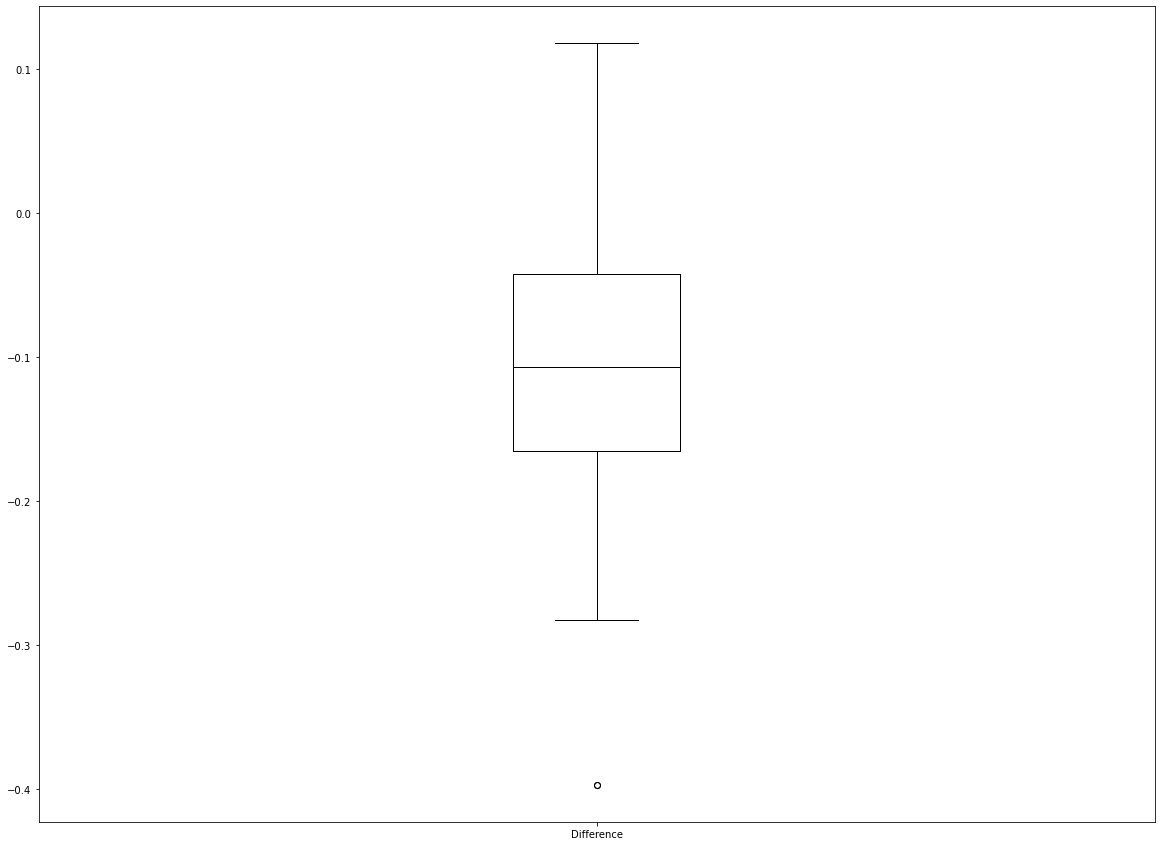

In [16]:
final_df.boxplot(color=dict(boxes='black', whiskers='black', medians='black', caps='black'), 
                      column='Difference', grid=False, figsize=(20, 15));

# 3. Machine Learning

## Round 1

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Instantiate regressor algorithms
GBR = GradientBoostingRegressor(random_state=42)
KNR = KNeighborsRegressor()
RFR = RandomForestRegressor(random_state=42)
SR = SVR()
ridge = Ridge(random_state=42)
xgbr = XGBRegressor(random_state=42)
light = LGBMRegressor(random_state=42)

regressors = [GBR, KNR, RFR, SR, ridge, xgbr, light]

In [18]:
# Create an empty df to save the results of each regressor for each round of feature removal
results_df = pd.DataFrame(columns = ['Gradient Boosting Regressor', 'K-Nearest Regressor', 'Random Forest Regressor', 'Support Vector Regressor', 
                                     'Ridge Regressor', 'X-Gradient Boosting Regressor', 'LightGBM Regressor'])

In [19]:
start = time.time()
val_score(final_df, 1, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 44 seconds


In [20]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.016, 0.0243]","[0.0554, 0.0703]","[0.0395, 0.0519]","[0.0716, 0.0902]","[0.0732, 0.0936]","[0.025, 0.0383]","[0.0531, 0.0701]"


### Feature Importance

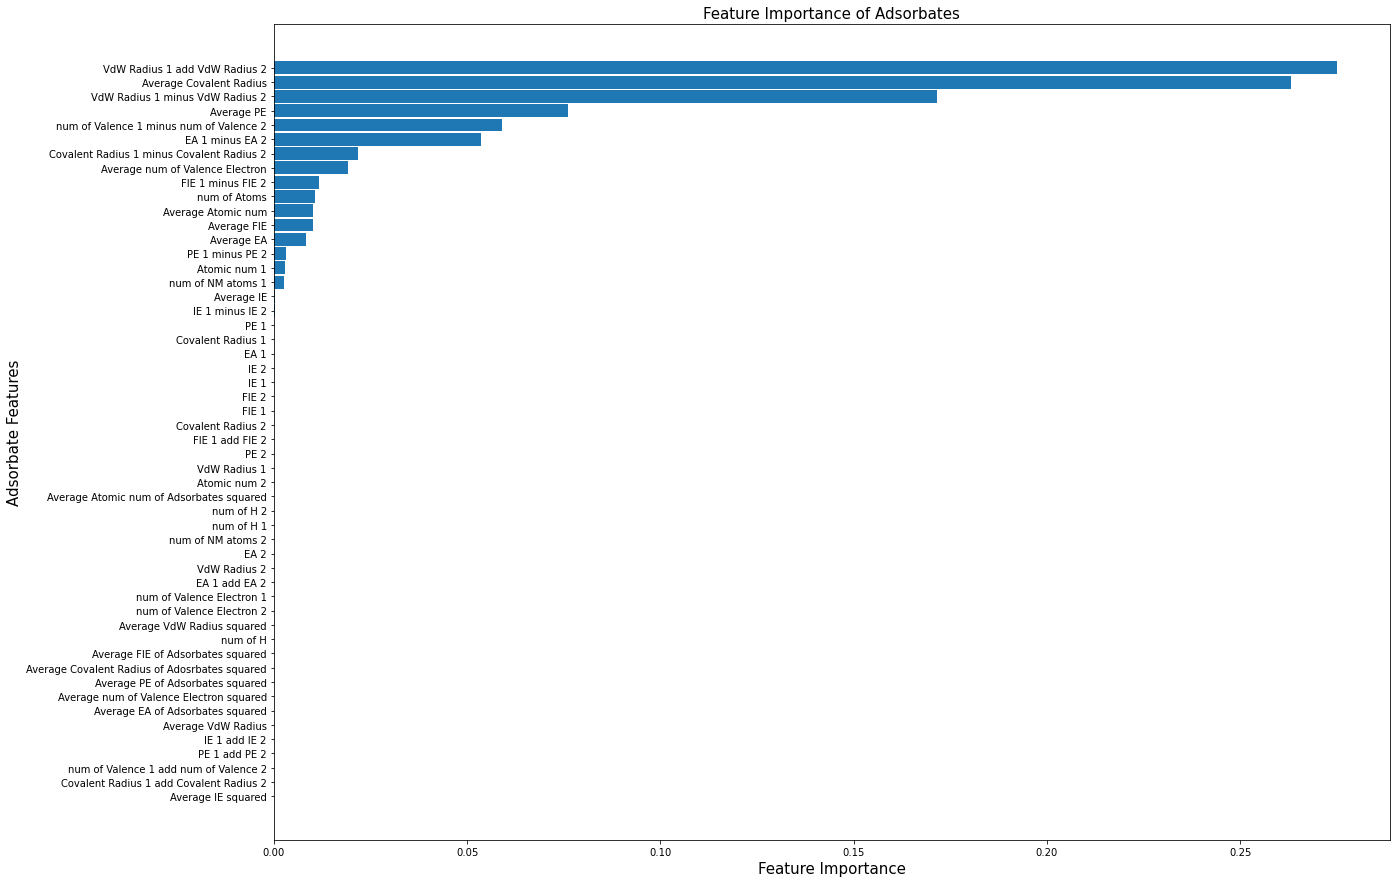

In [21]:
feature_importance(XGBRegressor(), final_df)

### Pearson's Correlation

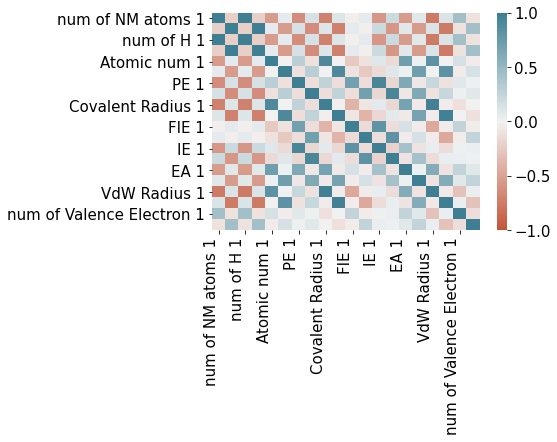

In [22]:
pearson_correlation(final_df)

## Round 2

In [23]:
# make a copy of the df from the previoud edition
df_v2 = final_df.copy()

In [24]:
# Drop the features
df_v2 = df_v2.drop(columns = ['PE 1 add PE 2',
       'Covalent Radius 1 add Covalent Radius 2','VdW Radius 1 add VdW Radius 2',
       'FIE 1 add FIE 2', 'EA 1 add EA 2',
       'num of Valence 1 add num of Valence 2',
       'IE 1 add IE 2'])

In [25]:
start = time.time()
val_score(df_v2, 2, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 43 seconds


In [26]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.016, 0.0243]","[0.0554, 0.0703]","[0.0395, 0.0519]","[0.0716, 0.0902]","[0.0732, 0.0936]","[0.025, 0.0383]","[0.0531, 0.0701]"
2,"[0.0168, 0.0252]","[0.0554, 0.0703]","[0.0395, 0.052]","[0.0715, 0.0902]","[0.0751, 0.0951]","[0.0249, 0.0382]","[0.0532, 0.0703]"


### Feature Importance and Correlation (Round 2)

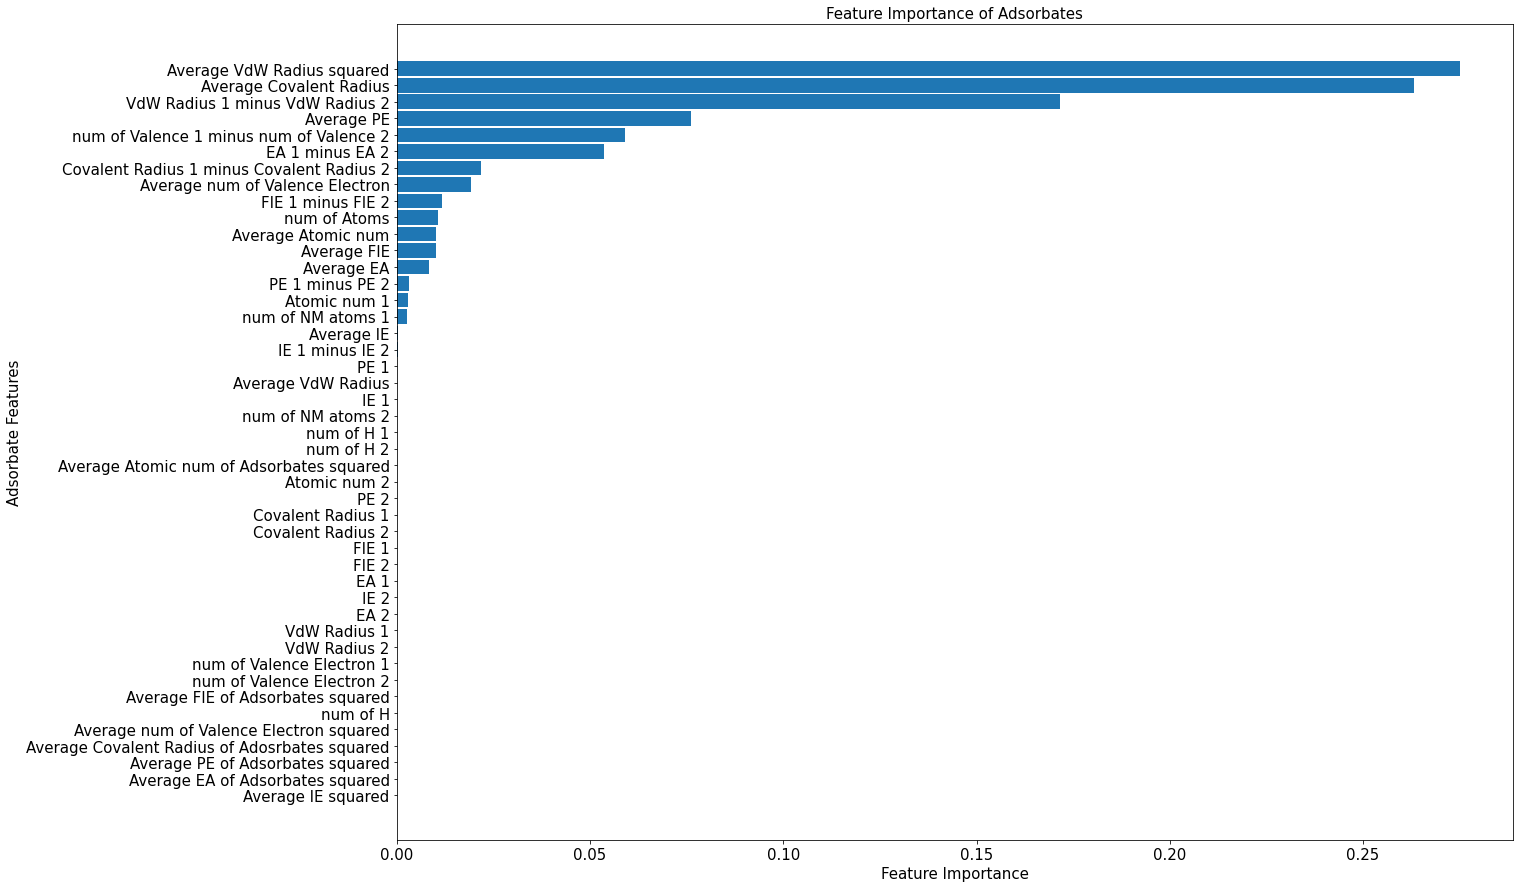

In [27]:
feature_importance(XGBRegressor(), df_v2)

## Round 3

In [28]:
df_v3 = df_v2.copy()

### Justification for dropping features

low importance single features were removed in this iteration of adjustments.

- 12 features (6 pairs) of adsorbate features were removed

In [29]:
df_v3 = df_v3.drop(columns = ['Average EA of Adsorbates squared', 'Average PE of Adsorbates squared',
       'Average Covalent Radius of Adosrbates squared',
       'Average FIE of Adsorbates squared',
       'Average Atomic num of Adsorbates squared',
       'Average num of Valence Electron squared', 'Average IE squared'])

In [30]:
start = time.time()
val_score(df_v3, 3, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 41 seconds


In [31]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.016, 0.0243]","[0.0554, 0.0703]","[0.0395, 0.0519]","[0.0716, 0.0902]","[0.0732, 0.0936]","[0.025, 0.0383]","[0.0531, 0.0701]"
2,"[0.0168, 0.0252]","[0.0554, 0.0703]","[0.0395, 0.052]","[0.0715, 0.0902]","[0.0751, 0.0951]","[0.0249, 0.0382]","[0.0532, 0.0703]"
3,"[0.0172, 0.0258]","[0.0636, 0.0819]","[0.0405, 0.0534]","[0.0814, 0.0999]","[0.0759, 0.0965]","[0.025, 0.0384]","[0.0543, 0.0716]"


### Feature Importance and Correlation (Round 3)

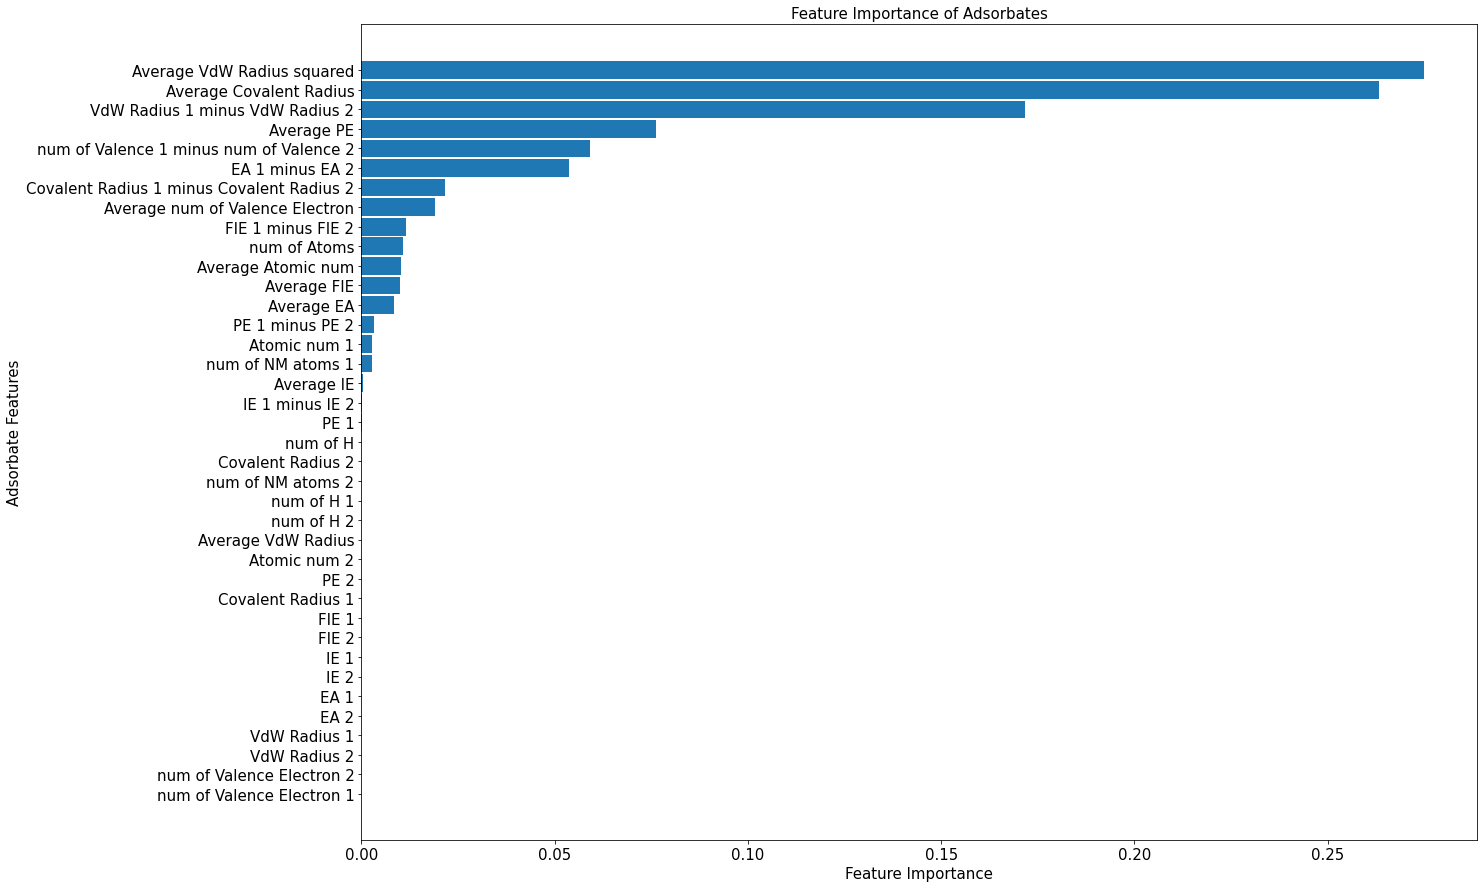

In [32]:
feature_importance(XGBRegressor(), df_v3)

## Round 4

In [33]:
df_v4 = df_v3.copy()

In [34]:
df_v4 = df_v4.drop(columns = ['num of H 1', 'num of H 2', 'num of H', 'FIE 1',
       'FIE 2', 'IE 1', 'IE 2'])

In [35]:
start = time.time()
val_score(df_v4, 4, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 40 seconds


In [36]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.016, 0.0243]","[0.0554, 0.0703]","[0.0395, 0.0519]","[0.0716, 0.0902]","[0.0732, 0.0936]","[0.025, 0.0383]","[0.0531, 0.0701]"
2,"[0.0168, 0.0252]","[0.0554, 0.0703]","[0.0395, 0.052]","[0.0715, 0.0902]","[0.0751, 0.0951]","[0.0249, 0.0382]","[0.0532, 0.0703]"
3,"[0.0172, 0.0258]","[0.0636, 0.0819]","[0.0405, 0.0534]","[0.0814, 0.0999]","[0.0759, 0.0965]","[0.025, 0.0384]","[0.0543, 0.0716]"
4,"[0.0159, 0.0241]","[0.0644, 0.0841]","[0.0382, 0.0505]","[0.0772, 0.0953]","[0.0731, 0.0934]","[0.0247, 0.038]","[0.054, 0.0712]"


### Feature Importance and Correlation (Round 4)

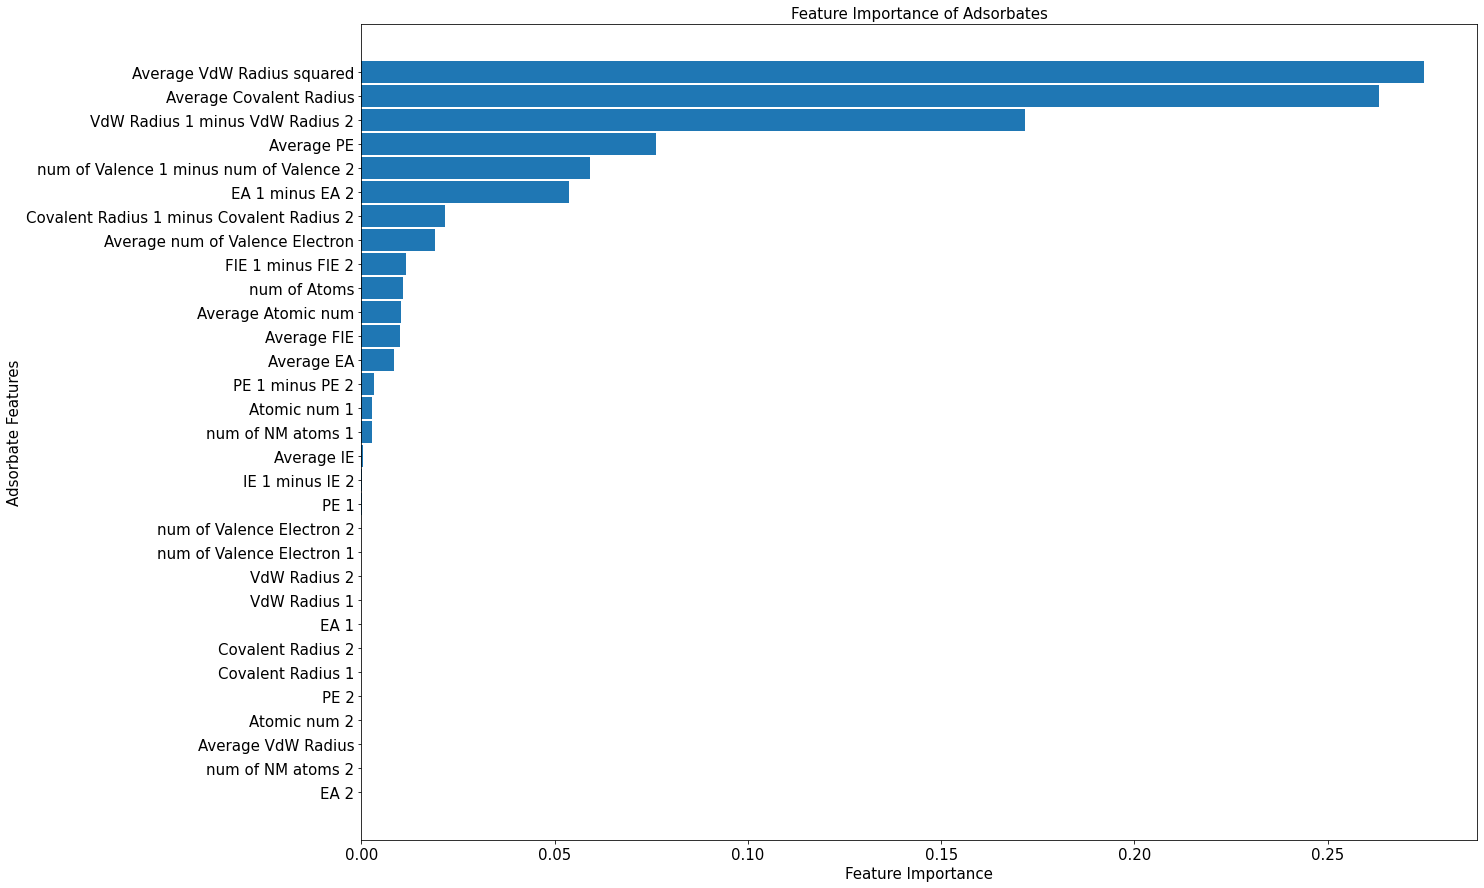

In [37]:
feature_importance(XGBRegressor(), df_v4)

## Round 5

In [38]:
df_v5 = df_v4.copy()

In [39]:
df_v5 = df_v5.drop(columns = ['num of NM atoms 1', 'num of NM atoms 2', 'EA 1', 'EA 2', 'Atomic num 1',
       'Atomic num 2', 'PE 1', 'PE 2', 'VdW Radius 1',
       'VdW Radius 2', 'Covalent Radius 1', 'Covalent Radius 2', 
       'num of Valence Electron 1', 'num of Valence Electron 2', 'Average VdW Radius', 'IE 1 minus IE 2',
       'Average IE'])

In [40]:
start = time.time()
val_score(df_v5, 5, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 40 seconds


In [41]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.016, 0.0243]","[0.0554, 0.0703]","[0.0395, 0.0519]","[0.0716, 0.0902]","[0.0732, 0.0936]","[0.025, 0.0383]","[0.0531, 0.0701]"
2,"[0.0168, 0.0252]","[0.0554, 0.0703]","[0.0395, 0.052]","[0.0715, 0.0902]","[0.0751, 0.0951]","[0.0249, 0.0382]","[0.0532, 0.0703]"
3,"[0.0172, 0.0258]","[0.0636, 0.0819]","[0.0405, 0.0534]","[0.0814, 0.0999]","[0.0759, 0.0965]","[0.025, 0.0384]","[0.0543, 0.0716]"
4,"[0.0159, 0.0241]","[0.0644, 0.0841]","[0.0382, 0.0505]","[0.0772, 0.0953]","[0.0731, 0.0934]","[0.0247, 0.038]","[0.054, 0.0712]"
5,"[0.0107, 0.0178]","[0.0674, 0.0894]","[0.0316, 0.0414]","[0.0711, 0.0881]","[0.0645, 0.0838]","[0.0103, 0.0181]","[0.0526, 0.0692]"


### Feature Importance and Correlation (Round 5)

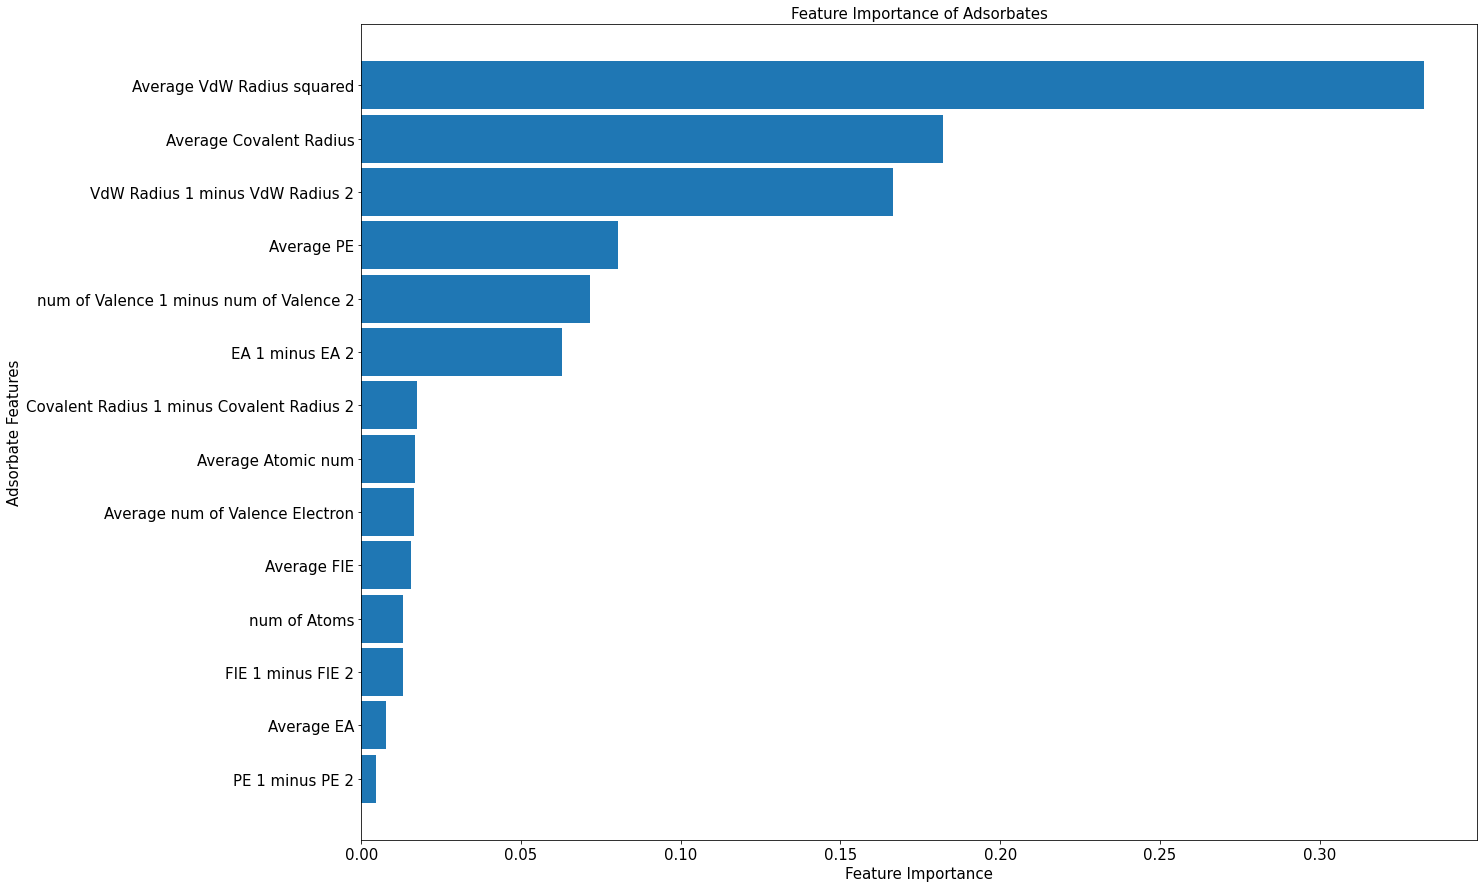

In [42]:
feature_importance(XGBRegressor(), df_v5)

### Pearson's Correlation (Round 5)

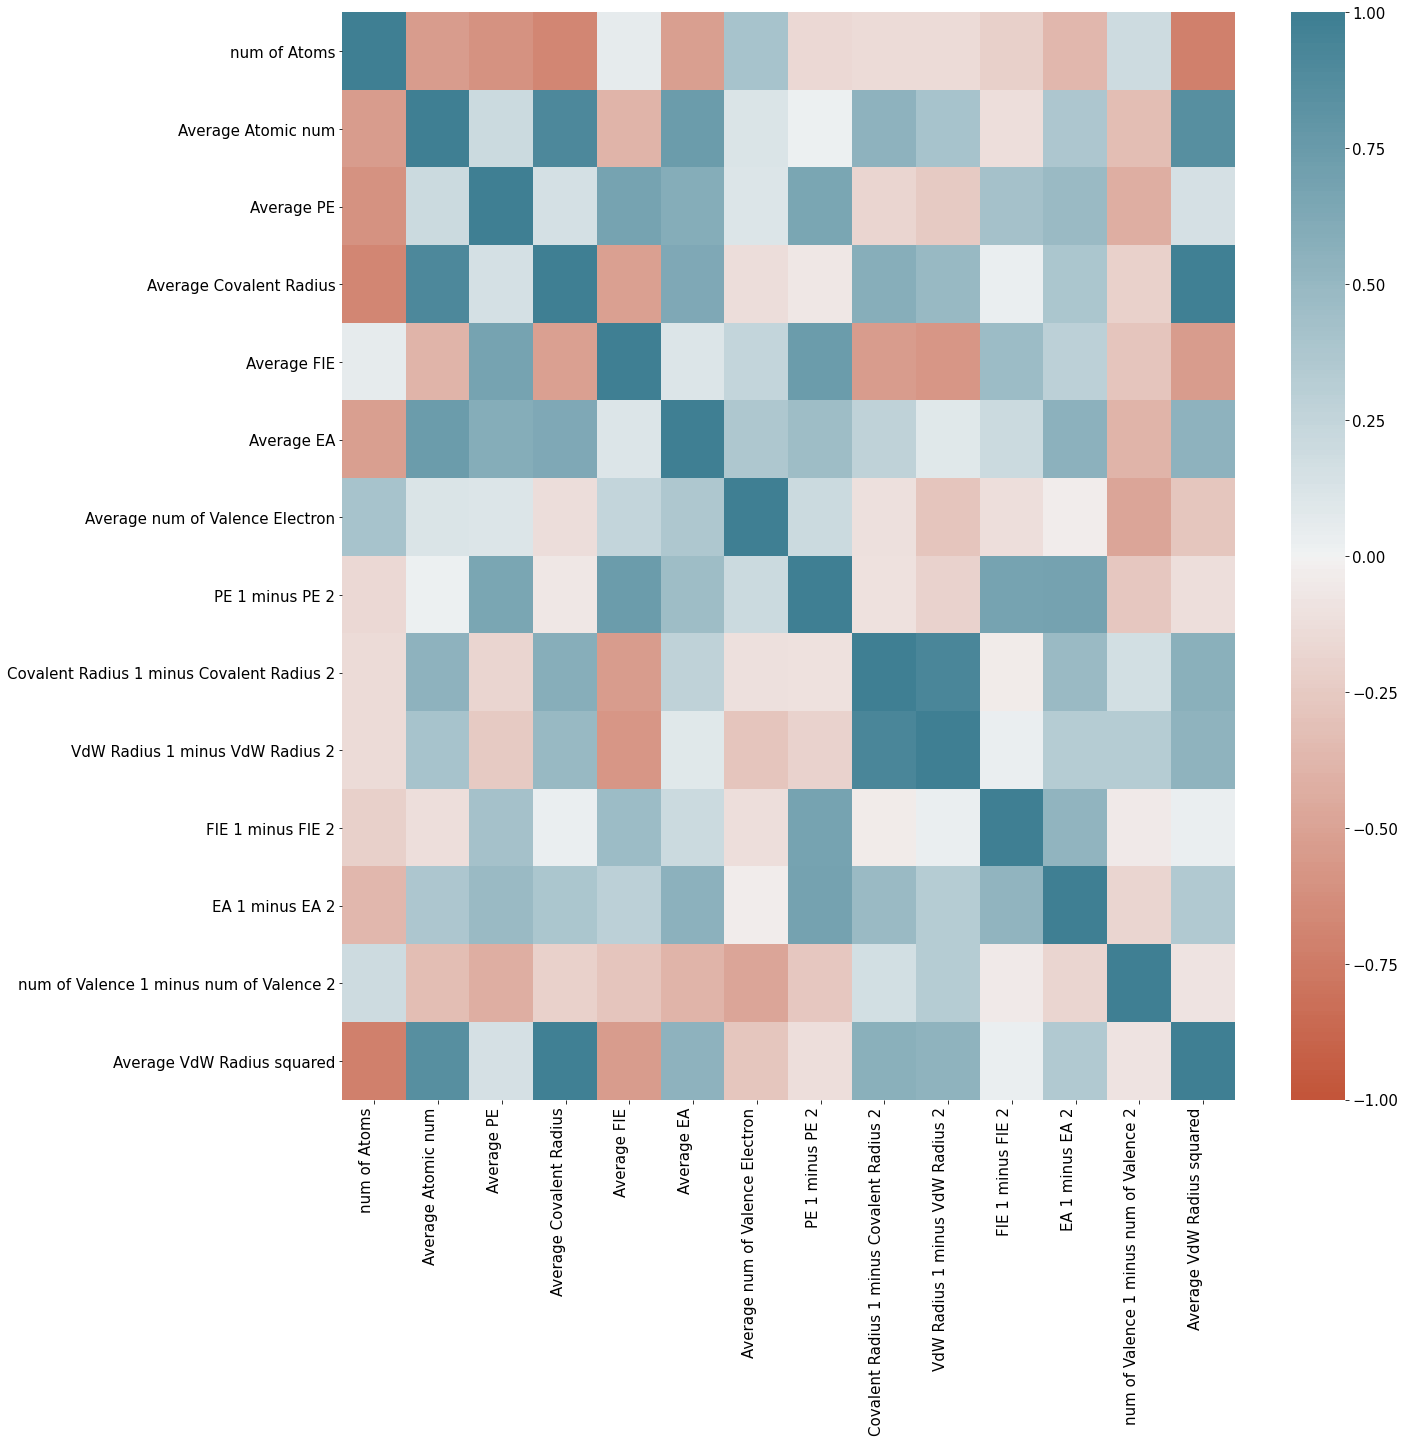

In [43]:
pearson_correlation(df_v5, last=True)

# 4. Hyperparameter Tuning

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import xgboost
import lightgbm

In [45]:
GBR = GradientBoostingRegressor(random_state=42)
KNR = KNeighborsRegressor()
RFR = RandomForestRegressor(random_state=42)
SR = SVR()
ridge = Ridge(random_state=42)
xgbr = xgboost.XGBRegressor(random_state=42)
light = lightgbm.LGBMRegressor(random_state=42)

In [46]:
features = df_v5.iloc[:, 0:-1]
target = df_v5.iloc[:, -1]

In [47]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedKFold


# Defining XGBR hyperparameters
xgbr_grid = {
    
    'min_child_weight': [1, 5, 10],
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.3, 1, 2],
    'colsample_bytree': [0.1, 0.5, 0.8],
    'colsample_bylevel': [0.1, 0.5, 0.8],

}


fold = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state = 42)

In [48]:
# Performing Randomized CV search on XGBR
xgbr_grid_cv = GridSearchCV(estimator = xgbr, cv = fold,
            param_grid = xgbr_grid, n_jobs = -1, scoring='neg_root_mean_squared_error',
            verbose = 5, return_train_score = True, refit = True)

In [49]:
xgbr_grid_cv.fit(features, target)

Fitting 10 folds for each of 972 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 850 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 2516 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 3344 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 4244 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 5216 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 6260 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 7376 tasks      | e

GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=10, random_state=42),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=n...
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.1, 0.5, 0.8],
                         'colsampl

In [50]:
xgbr_grid_cv.best_params_

{'colsample_bylevel': 0.8,
 'colsample_bytree': 0.5,
 'learning_rate': 1,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 100}

In [51]:
xgbr_grid_cv.best_score_

-0.0064884938121926305

In [52]:
xgbr_grid_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=6, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=16, num_parallel_tree=1, random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [145]:
from sklearn.model_selection import cross_val_score

xgbr_optimized = xgbr_grid_cv.best_estimator_

rmse_score = cross_val_score(xgbr_optimized, features, target, cv = fold, scoring='neg_root_mean_squared_error')
mae_score = cross_val_score(xgbr_optimized, features, target, cv = fold, scoring='neg_mean_absolute_error')

In [146]:
optimized_xgbr_rmse = np.abs(rmse_score).mean()
optimized_xgbr_mae = np.abs(mae_score).mean()

In [147]:
optimized_xgbr_rmse, optimized_xgbr_mae

(0.014244851754590736, 0.0081911801554914)

# 5. Different Separation Ratios

In [148]:
from tqdm.auto import tqdm

separations = [2,3,4,5,6,7,8,9,10]

mae_results = []
rmse_results = []
r2_results = []

for split in tqdm(separations):
    fold = RepeatedKFold(n_splits=split, n_repeats=10, random_state=42)
    mae = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='neg_mean_absolute_error')
    rmse = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='neg_root_mean_squared_error')
    r2 = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='r2')
    mae_results.append(np.abs(mae).mean())
    rmse_results.append(np.abs(rmse).mean())
    r2_results.append(np.abs(r2).mean())

In [149]:
r2_results

[0.5988547089619825,
 0.7789195065501391,
 0.8161171486524752,
 0.8298274175290759,
 0.9251730734479555,
 0.8757907459063677,
 0.9222446172675596,
 0.9263082505781873,
 0.9202877707787073]

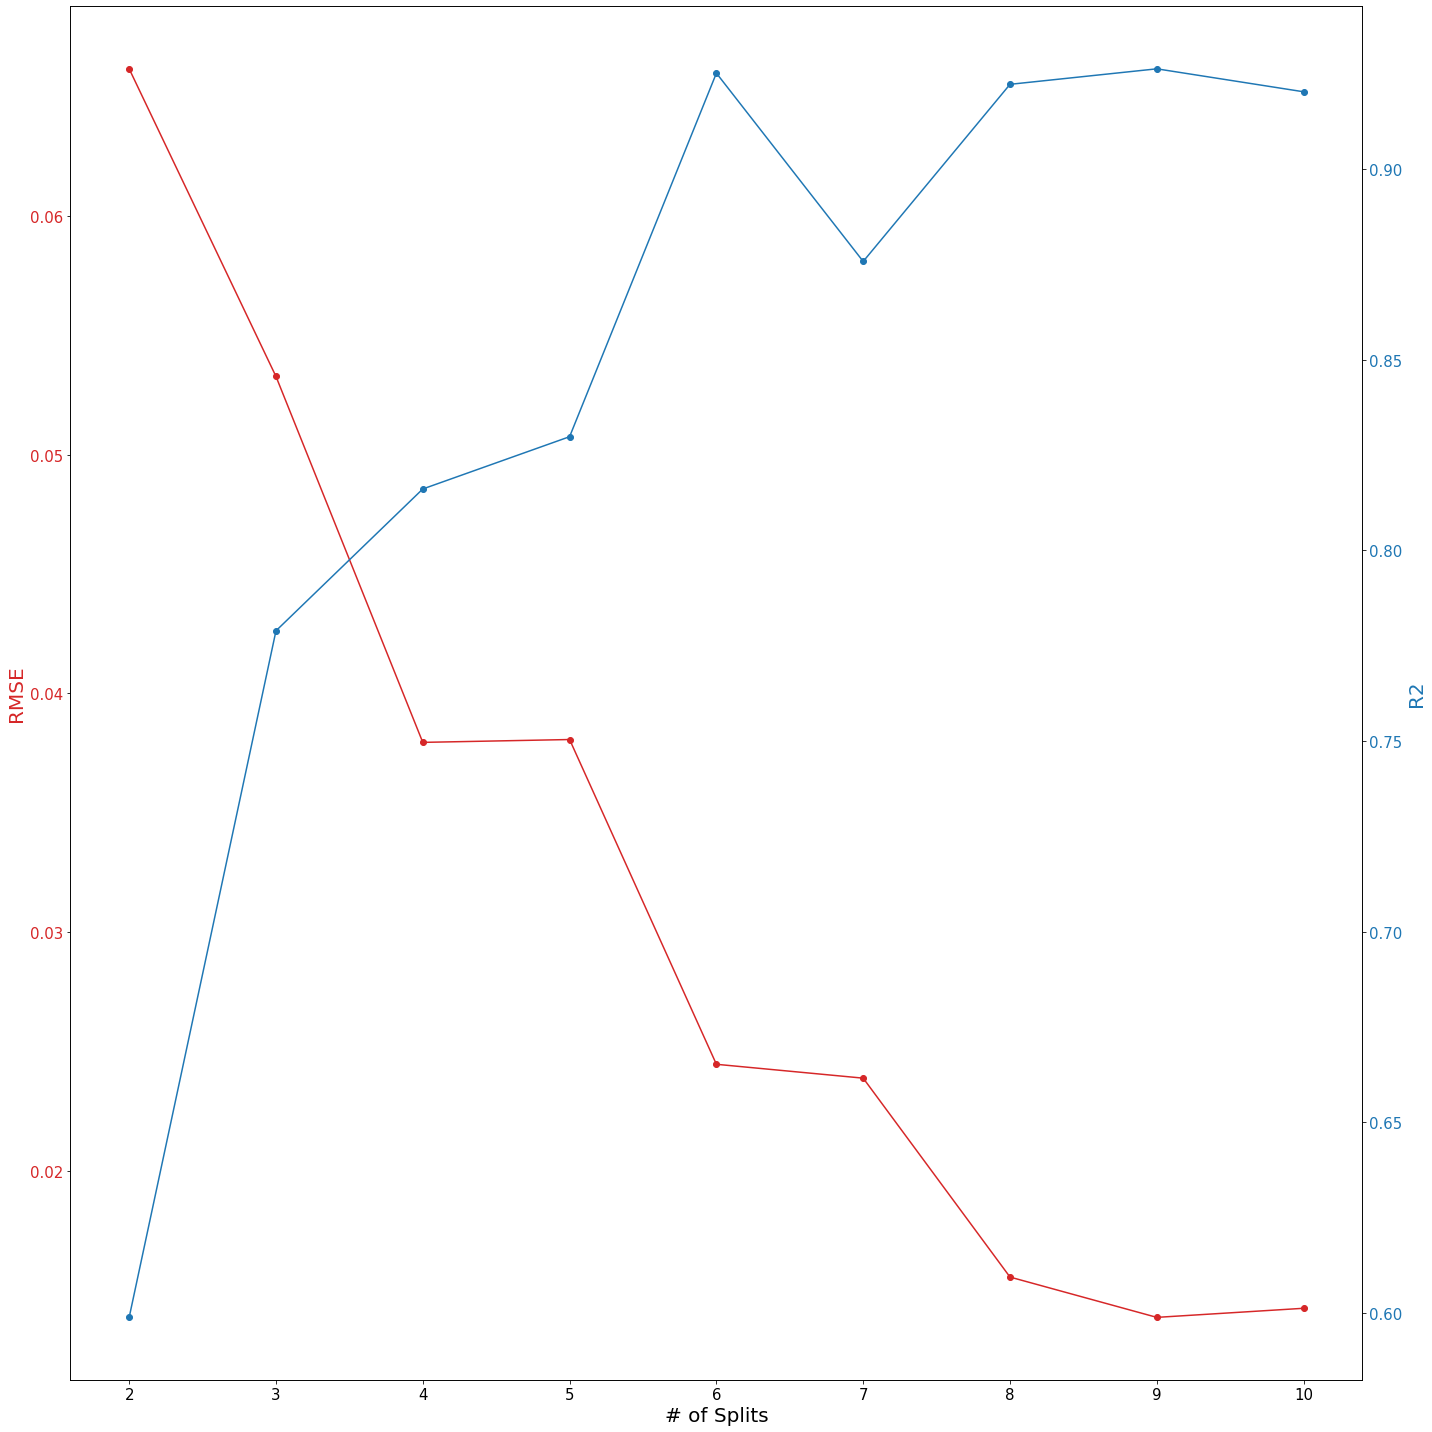

In [150]:
t = separations
data1 = rmse_results
data2 = r2_results

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('# of Splits', size = 20)
ax1.set_ylabel('RMSE', color=color, size = 20)
ax1.plot(t, data1, color=color, marker = 'o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2', color=color, size = 20)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color, marker = 'o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [151]:
from nn import train_model_rmse, train_model_mae, load_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.9, random_state = 42)

In [152]:
start = time.time()
model_history_rmse = train_model_rmse(X_train, y_train, num_cols = len(features.columns))
end = time.time()

print('Time taken to train this neural network was {} seconds'.format(int(end - start)))

Epoch 1/1600
1/1 [==============================] - 1s 784ms/step - loss: 0.1701 - val_loss: 0.1139

Epoch 00001: val_loss improved from inf to 0.11390, saving model to model_best_weights.h5
Epoch 2/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.1868 - val_loss: 0.1132

Epoch 00002: val_loss improved from 0.11390 to 0.11322, saving model to model_best_weights.h5
Epoch 3/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.1704 - val_loss: 0.1124

Epoch 00003: val_loss improved from 0.11322 to 0.11240, saving model to model_best_weights.h5
Epoch 4/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.1708 - val_loss: 0.1115

Epoch 00004: val_loss improved from 0.11240 to 0.11154, saving model to model_best_weights.h5
Epoch 5/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.1609 - val_loss: 0.1107

Epoch 00005: val_loss improved from 0.11154 to 0.11067, saving model to model_best_weights.h5
Epoch 6/1600
1/1 [===============

1/1 [==============================] - 0s 29ms/step - loss: 0.1085 - val_loss: 0.0773

Epoch 00043: val_loss did not improve from 0.06418
Epoch 44/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.1056 - val_loss: 0.0807

Epoch 00044: val_loss did not improve from 0.06418
Epoch 45/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.1027 - val_loss: 0.0838

Epoch 00045: val_loss did not improve from 0.06418
Epoch 46/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.1037 - val_loss: 0.0846

Epoch 00046: val_loss did not improve from 0.06418
Epoch 47/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.1043 - val_loss: 0.0841

Epoch 00047: val_loss did not improve from 0.06418
Epoch 48/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.1114 - val_loss: 0.0831

Epoch 00048: val_loss did not improve from 0.06418
Epoch 49/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0992 - val_loss: 0.0812

E

1/1 [==============================] - 0s 26ms/step - loss: 0.0894 - val_loss: 0.0705

Epoch 00096: val_loss did not improve from 0.06213
Epoch 97/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0673 - val_loss: 0.0742

Epoch 00097: val_loss did not improve from 0.06213
Epoch 98/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0799 - val_loss: 0.0767

Epoch 00098: val_loss did not improve from 0.06213
Epoch 99/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0696 - val_loss: 0.0757

Epoch 00099: val_loss did not improve from 0.06213
Epoch 100/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0819 - val_loss: 0.0769

Epoch 00100: val_loss did not improve from 0.06213
Epoch 101/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0705 - val_loss: 0.0775

Epoch 00101: val_loss did not improve from 0.06213
Epoch 102/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0796 - val_loss: 0.0788

1/1 [==============================] - 0s 26ms/step - loss: 0.0518 - val_loss: 0.0658

Epoch 00149: val_loss did not improve from 0.06178
Epoch 150/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0564 - val_loss: 0.0654

Epoch 00150: val_loss did not improve from 0.06178
Epoch 151/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0414 - val_loss: 0.0630

Epoch 00151: val_loss did not improve from 0.06178
Epoch 152/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0682 - val_loss: 0.0603

Epoch 00152: val_loss improved from 0.06178 to 0.06030, saving model to model_best_weights.h5
Epoch 153/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0539 - val_loss: 0.0574

Epoch 00153: val_loss improved from 0.06030 to 0.05741, saving model to model_best_weights.h5
Epoch 154/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0524 - val_loss: 0.0573

Epoch 00154: val_loss improved from 0.05741 to 0.05733, saving


Epoch 00201: val_loss did not improve from 0.05563
Epoch 202/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0632 - val_loss: 0.0848

Epoch 00202: val_loss did not improve from 0.05563
Epoch 203/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0667 - val_loss: 0.0865

Epoch 00203: val_loss did not improve from 0.05563
Epoch 204/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0691 - val_loss: 0.0820

Epoch 00204: val_loss did not improve from 0.05563
Epoch 205/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0560 - val_loss: 0.0789

Epoch 00205: val_loss did not improve from 0.05563
Epoch 206/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0583 - val_loss: 0.0767

Epoch 00206: val_loss did not improve from 0.05563
Epoch 207/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0635 - val_loss: 0.0715

Epoch 00207: val_loss did not improve from 0.05563
Epoch 208/1600
1/1 [==========

1/1 [==============================] - 0s 27ms/step - loss: 0.0668 - val_loss: 0.0558

Epoch 00254: val_loss did not improve from 0.05005
Epoch 255/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0576 - val_loss: 0.0572

Epoch 00255: val_loss did not improve from 0.05005
Epoch 256/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0514 - val_loss: 0.0573

Epoch 00256: val_loss did not improve from 0.05005
Epoch 257/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0539 - val_loss: 0.0567

Epoch 00257: val_loss did not improve from 0.05005
Epoch 258/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0456 - val_loss: 0.0608

Epoch 00258: val_loss did not improve from 0.05005
Epoch 259/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0541 - val_loss: 0.0648

Epoch 00259: val_loss did not improve from 0.05005
Epoch 260/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0639 - val_loss: 0.0

1/1 [==============================] - 0s 26ms/step - loss: 0.0530 - val_loss: 0.0545

Epoch 00307: val_loss did not improve from 0.04909
Epoch 308/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0501 - val_loss: 0.0557

Epoch 00308: val_loss did not improve from 0.04909
Epoch 309/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0469 - val_loss: 0.0617

Epoch 00309: val_loss did not improve from 0.04909
Epoch 310/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0519 - val_loss: 0.0631

Epoch 00310: val_loss did not improve from 0.04909
Epoch 311/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0681 - val_loss: 0.0626

Epoch 00311: val_loss did not improve from 0.04909
Epoch 312/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0376 - val_loss: 0.0608

Epoch 00312: val_loss did not improve from 0.04909
Epoch 313/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0540 - val_loss: 0.0


Epoch 00360: val_loss did not improve from 0.04909
Epoch 361/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0408 - val_loss: 0.0626

Epoch 00361: val_loss did not improve from 0.04909
Epoch 362/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0528 - val_loss: 0.0623

Epoch 00362: val_loss did not improve from 0.04909
Epoch 363/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0501 - val_loss: 0.0626

Epoch 00363: val_loss did not improve from 0.04909
Epoch 364/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0496 - val_loss: 0.0643

Epoch 00364: val_loss did not improve from 0.04909
Epoch 365/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0515 - val_loss: 0.0636

Epoch 00365: val_loss did not improve from 0.04909
Epoch 366/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0491 - val_loss: 0.0649

Epoch 00366: val_loss did not improve from 0.04909
Epoch 367/1600
1/1 [==========

1/1 [==============================] - 0s 26ms/step - loss: 0.0643 - val_loss: 0.0567

Epoch 00413: val_loss did not improve from 0.04553
Epoch 414/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0535 - val_loss: 0.0581

Epoch 00414: val_loss did not improve from 0.04553
Epoch 415/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0553 - val_loss: 0.0613

Epoch 00415: val_loss did not improve from 0.04553
Epoch 416/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0475 - val_loss: 0.0635

Epoch 00416: val_loss did not improve from 0.04553
Epoch 417/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0503 - val_loss: 0.0601

Epoch 00417: val_loss did not improve from 0.04553
Epoch 418/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0503 - val_loss: 0.0571

Epoch 00418: val_loss did not improve from 0.04553
Epoch 419/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0491 - val_loss: 0.0


Epoch 00466: val_loss did not improve from 0.04553
Epoch 467/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0724 - val_loss: 0.0838

Epoch 00467: val_loss did not improve from 0.04553
Epoch 468/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0482 - val_loss: 0.0815

Epoch 00468: val_loss did not improve from 0.04553
Epoch 469/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0628 - val_loss: 0.0529

Epoch 00469: val_loss did not improve from 0.04553
Epoch 470/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0524 - val_loss: 0.0495

Epoch 00470: val_loss did not improve from 0.04553
Epoch 471/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0641 - val_loss: 0.0473

Epoch 00471: val_loss did not improve from 0.04553
Epoch 472/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0361 - val_loss: 0.0486

Epoch 00472: val_loss did not improve from 0.04553
Epoch 473/1600
1/1 [==========

1/1 [==============================] - 0s 27ms/step - loss: 0.0473 - val_loss: 0.0570

Epoch 00520: val_loss did not improve from 0.04553
Epoch 521/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0585 - val_loss: 0.0592

Epoch 00521: val_loss did not improve from 0.04553
Epoch 522/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0555 - val_loss: 0.0608

Epoch 00522: val_loss did not improve from 0.04553
Epoch 523/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0541 - val_loss: 0.0620

Epoch 00523: val_loss did not improve from 0.04553
Epoch 524/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0452 - val_loss: 0.0654

Epoch 00524: val_loss did not improve from 0.04553
Epoch 525/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0553 - val_loss: 0.0692

Epoch 00525: val_loss did not improve from 0.04553
Epoch 526/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0650 - val_loss: 0.0


Epoch 00573: val_loss did not improve from 0.04553
Epoch 574/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0652 - val_loss: 0.0531

Epoch 00574: val_loss did not improve from 0.04553
Epoch 575/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0709 - val_loss: 0.0574

Epoch 00575: val_loss did not improve from 0.04553
Epoch 576/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0464 - val_loss: 0.0602

Epoch 00576: val_loss did not improve from 0.04553
Epoch 577/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0620 - val_loss: 0.0592

Epoch 00577: val_loss did not improve from 0.04553
Epoch 578/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0683 - val_loss: 0.0622

Epoch 00578: val_loss did not improve from 0.04553
Epoch 579/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0620 - val_loss: 0.0615

Epoch 00579: val_loss did not improve from 0.04553
Epoch 580/1600
1/1 [==========


Epoch 00626: val_loss did not improve from 0.04356
Epoch 627/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0514 - val_loss: 0.0582

Epoch 00627: val_loss did not improve from 0.04356
Epoch 628/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0504 - val_loss: 0.0553

Epoch 00628: val_loss did not improve from 0.04356
Epoch 629/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0519 - val_loss: 0.0528

Epoch 00629: val_loss did not improve from 0.04356
Epoch 630/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0539 - val_loss: 0.0554

Epoch 00630: val_loss did not improve from 0.04356
Epoch 631/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0554 - val_loss: 0.0526

Epoch 00631: val_loss did not improve from 0.04356
Epoch 632/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0445 - val_loss: 0.0522

Epoch 00632: val_loss did not improve from 0.04356
Epoch 633/1600
1/1 [==========


Epoch 00679: val_loss did not improve from 0.04065
Epoch 680/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0484 - val_loss: 0.0533

Epoch 00680: val_loss did not improve from 0.04065
Epoch 681/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0549 - val_loss: 0.0537

Epoch 00681: val_loss did not improve from 0.04065
Epoch 682/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0575 - val_loss: 0.0560

Epoch 00682: val_loss did not improve from 0.04065
Epoch 683/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0457 - val_loss: 0.0539

Epoch 00683: val_loss did not improve from 0.04065
Epoch 684/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0470 - val_loss: 0.0507

Epoch 00684: val_loss did not improve from 0.04065
Epoch 685/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0450 - val_loss: 0.0492

Epoch 00685: val_loss did not improve from 0.04065
Epoch 686/1600
1/1 [==========

1/1 [==============================] - 0s 26ms/step - loss: 0.0541 - val_loss: 0.0484

Epoch 00732: val_loss did not improve from 0.03784
Epoch 733/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0372 - val_loss: 0.0491

Epoch 00733: val_loss did not improve from 0.03784
Epoch 734/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0517 - val_loss: 0.0493

Epoch 00734: val_loss did not improve from 0.03784
Epoch 735/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0413 - val_loss: 0.0502

Epoch 00735: val_loss did not improve from 0.03784
Epoch 736/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0597 - val_loss: 0.0508

Epoch 00736: val_loss did not improve from 0.03784
Epoch 737/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0528 - val_loss: 0.0501

Epoch 00737: val_loss did not improve from 0.03784
Epoch 738/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0586 - val_loss: 0.0


Epoch 00785: val_loss did not improve from 0.03784
Epoch 786/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0508 - val_loss: 0.0409

Epoch 00786: val_loss did not improve from 0.03784
Epoch 787/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0418 - val_loss: 0.0415

Epoch 00787: val_loss did not improve from 0.03784
Epoch 788/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0491 - val_loss: 0.0431

Epoch 00788: val_loss did not improve from 0.03784
Epoch 789/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0352 - val_loss: 0.0448

Epoch 00789: val_loss did not improve from 0.03784
Epoch 790/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0627 - val_loss: 0.0474

Epoch 00790: val_loss did not improve from 0.03784
Epoch 791/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0579 - val_loss: 0.0479

Epoch 00791: val_loss did not improve from 0.03784
Epoch 792/1600
1/1 [==========

1/1 [==============================] - 0s 26ms/step - loss: 0.0601 - val_loss: 0.0565

Epoch 00839: val_loss did not improve from 0.03784
Epoch 840/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0565 - val_loss: 0.0580

Epoch 00840: val_loss did not improve from 0.03784
Epoch 841/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0498 - val_loss: 0.0647

Epoch 00841: val_loss did not improve from 0.03784
Epoch 842/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0463 - val_loss: 0.0753

Epoch 00842: val_loss did not improve from 0.03784
Epoch 843/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0447 - val_loss: 0.0857

Epoch 00843: val_loss did not improve from 0.03784
Epoch 844/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0487 - val_loss: 0.0501

Epoch 00844: val_loss did not improve from 0.03784
Epoch 845/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0396 - val_loss: 0.0


Epoch 00892: val_loss did not improve from 0.03784
Epoch 893/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0423 - val_loss: 0.0571

Epoch 00893: val_loss did not improve from 0.03784
Epoch 894/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0512 - val_loss: 0.0574

Epoch 00894: val_loss did not improve from 0.03784
Epoch 895/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0544 - val_loss: 0.0583

Epoch 00895: val_loss did not improve from 0.03784
Epoch 896/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0408 - val_loss: 0.0592

Epoch 00896: val_loss did not improve from 0.03784
Epoch 897/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0437 - val_loss: 0.0607

Epoch 00897: val_loss did not improve from 0.03784
Epoch 898/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0434 - val_loss: 0.0650

Epoch 00898: val_loss did not improve from 0.03784
Epoch 899/1600
1/1 [==========

1/1 [==============================] - 0s 26ms/step - loss: 0.0673 - val_loss: 0.0571

Epoch 00946: val_loss did not improve from 0.03784
Epoch 947/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0622 - val_loss: 0.0613

Epoch 00947: val_loss did not improve from 0.03784
Epoch 948/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0568 - val_loss: 0.0583

Epoch 00948: val_loss did not improve from 0.03784
Epoch 949/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0494 - val_loss: 0.0553

Epoch 00949: val_loss did not improve from 0.03784
Epoch 950/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0595 - val_loss: 0.0539

Epoch 00950: val_loss did not improve from 0.03784
Epoch 951/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0590 - val_loss: 0.0613

Epoch 00951: val_loss did not improve from 0.03784
Epoch 952/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0729 - val_loss: 0.0


Epoch 00999: val_loss did not improve from 0.03784
Epoch 1000/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0443 - val_loss: 0.0576

Epoch 01000: val_loss did not improve from 0.03784
Epoch 1001/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0507 - val_loss: 0.0568

Epoch 01001: val_loss did not improve from 0.03784
Epoch 1002/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0546 - val_loss: 0.0556

Epoch 01002: val_loss did not improve from 0.03784
Epoch 1003/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0443 - val_loss: 0.0549

Epoch 01003: val_loss did not improve from 0.03784
Epoch 1004/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0498 - val_loss: 0.0530

Epoch 01004: val_loss did not improve from 0.03784
Epoch 1005/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0643 - val_loss: 0.0546

Epoch 01005: val_loss did not improve from 0.03784
Epoch 1006/1600
1/1 [===

1/1 [==============================] - 0s 27ms/step - loss: 0.0380 - val_loss: 0.0550

Epoch 01053: val_loss did not improve from 0.03784
Epoch 1054/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0589 - val_loss: 0.0570

Epoch 01054: val_loss did not improve from 0.03784
Epoch 1055/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0647 - val_loss: 0.0585

Epoch 01055: val_loss did not improve from 0.03784
Epoch 1056/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0676 - val_loss: 0.0575

Epoch 01056: val_loss did not improve from 0.03784
Epoch 1057/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0547 - val_loss: 0.0561

Epoch 01057: val_loss did not improve from 0.03784
Epoch 1058/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0548 - val_loss: 0.0550

Epoch 01058: val_loss did not improve from 0.03784
Epoch 1059/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0358 - val_los

1/1 [==============================] - 0s 28ms/step - loss: 0.0436 - val_loss: 0.0561

Epoch 01106: val_loss did not improve from 0.03784
Epoch 1107/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0448 - val_loss: 0.0529

Epoch 01107: val_loss did not improve from 0.03784
Epoch 1108/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0540 - val_loss: 0.0514

Epoch 01108: val_loss did not improve from 0.03784
Epoch 1109/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0657 - val_loss: 0.0513

Epoch 01109: val_loss did not improve from 0.03784
Epoch 1110/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0570 - val_loss: 0.0507

Epoch 01110: val_loss did not improve from 0.03784
Epoch 1111/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0472 - val_loss: 0.0472

Epoch 01111: val_loss did not improve from 0.03784
Epoch 1112/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0416 - val_los

1/1 [==============================] - 0s 28ms/step - loss: 0.0670 - val_loss: 0.0416

Epoch 01159: val_loss did not improve from 0.03784
Epoch 1160/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0412 - val_loss: 0.0437

Epoch 01160: val_loss did not improve from 0.03784
Epoch 1161/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0540 - val_loss: 0.0450

Epoch 01161: val_loss did not improve from 0.03784
Epoch 1162/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0484 - val_loss: 0.0460

Epoch 01162: val_loss did not improve from 0.03784
Epoch 1163/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0538 - val_loss: 0.0475

Epoch 01163: val_loss did not improve from 0.03784
Epoch 1164/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0412 - val_loss: 0.0495

Epoch 01164: val_loss did not improve from 0.03784
Epoch 1165/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0540 - val_los

1/1 [==============================] - 0s 26ms/step - loss: 0.0384 - val_loss: 0.0473

Epoch 01212: val_loss did not improve from 0.03784
Epoch 1213/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0413 - val_loss: 0.0452

Epoch 01213: val_loss did not improve from 0.03784
Epoch 1214/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0634 - val_loss: 0.0452

Epoch 01214: val_loss did not improve from 0.03784
Epoch 1215/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0429 - val_loss: 0.0511

Epoch 01215: val_loss did not improve from 0.03784
Epoch 1216/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0476 - val_loss: 0.0546

Epoch 01216: val_loss did not improve from 0.03784
Epoch 1217/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0561 - val_loss: 0.0546

Epoch 01217: val_loss did not improve from 0.03784
Epoch 1218/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0496 - val_los

1/1 [==============================] - 0s 24ms/step - loss: 0.0649 - val_loss: 0.0535

Epoch 01265: val_loss did not improve from 0.03784
Epoch 1266/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0581 - val_loss: 0.0552

Epoch 01266: val_loss did not improve from 0.03784
Epoch 1267/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0550 - val_loss: 0.0573

Epoch 01267: val_loss did not improve from 0.03784
Epoch 1268/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0667 - val_loss: 0.0600

Epoch 01268: val_loss did not improve from 0.03784
Epoch 1269/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0645 - val_loss: 0.0613

Epoch 01269: val_loss did not improve from 0.03784
Epoch 1270/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0584 - val_loss: 0.0640

Epoch 01270: val_loss did not improve from 0.03784
Epoch 1271/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0497 - val_los

1/1 [==============================] - 0s 26ms/step - loss: 0.0446 - val_loss: 0.0473

Epoch 01318: val_loss did not improve from 0.03784
Epoch 1319/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0458 - val_loss: 0.0470

Epoch 01319: val_loss did not improve from 0.03784
Epoch 1320/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0534 - val_loss: 0.0489

Epoch 01320: val_loss did not improve from 0.03784
Epoch 1321/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0436 - val_loss: 0.0489

Epoch 01321: val_loss did not improve from 0.03784
Epoch 1322/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0477 - val_loss: 0.0496

Epoch 01322: val_loss did not improve from 0.03784
Epoch 1323/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0525 - val_loss: 0.0490

Epoch 01323: val_loss did not improve from 0.03784
Epoch 1324/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0435 - val_los

1/1 [==============================] - 0s 32ms/step - loss: 0.0682 - val_loss: 0.0475

Epoch 01371: val_loss did not improve from 0.03784
Epoch 1372/1600
1/1 [==============================] - 0s 36ms/step - loss: 0.0469 - val_loss: 0.0472

Epoch 01372: val_loss did not improve from 0.03784
Epoch 1373/1600
1/1 [==============================] - 0s 32ms/step - loss: 0.0453 - val_loss: 0.0477

Epoch 01373: val_loss did not improve from 0.03784
Epoch 1374/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0492 - val_loss: 0.0495

Epoch 01374: val_loss did not improve from 0.03784
Epoch 1375/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0503 - val_loss: 0.0493

Epoch 01375: val_loss did not improve from 0.03784
Epoch 1376/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0420 - val_loss: 0.0509

Epoch 01376: val_loss did not improve from 0.03784
Epoch 1377/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0492 - val_los

1/1 [==============================] - 0s 26ms/step - loss: 0.0585 - val_loss: 0.0537

Epoch 01424: val_loss did not improve from 0.03784
Epoch 1425/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0490 - val_loss: 0.0535

Epoch 01425: val_loss did not improve from 0.03784
Epoch 1426/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0483 - val_loss: 0.0532

Epoch 01426: val_loss did not improve from 0.03784
Epoch 1427/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0581 - val_loss: 0.0530

Epoch 01427: val_loss did not improve from 0.03784
Epoch 1428/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0443 - val_loss: 0.0524

Epoch 01428: val_loss did not improve from 0.03784
Epoch 1429/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0501 - val_loss: 0.0539

Epoch 01429: val_loss did not improve from 0.03784
Epoch 1430/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0440 - val_los

1/1 [==============================] - 0s 27ms/step - loss: 0.0495 - val_loss: 0.0484

Epoch 01477: val_loss did not improve from 0.03784
Epoch 1478/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0426 - val_loss: 0.0465

Epoch 01478: val_loss did not improve from 0.03784
Epoch 1479/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0436 - val_loss: 0.0458

Epoch 01479: val_loss did not improve from 0.03784
Epoch 1480/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0567 - val_loss: 0.0449

Epoch 01480: val_loss did not improve from 0.03784
Epoch 1481/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0466 - val_loss: 0.0448

Epoch 01481: val_loss did not improve from 0.03784
Epoch 1482/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0480 - val_loss: 0.0454

Epoch 01482: val_loss did not improve from 0.03784
Epoch 1483/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0653 - val_los

1/1 [==============================] - 0s 27ms/step - loss: 0.0424 - val_loss: 0.0502

Epoch 01530: val_loss did not improve from 0.03784
Epoch 1531/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0401 - val_loss: 0.0497

Epoch 01531: val_loss did not improve from 0.03784
Epoch 1532/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0447 - val_loss: 0.0505

Epoch 01532: val_loss did not improve from 0.03784
Epoch 1533/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0400 - val_loss: 0.0527

Epoch 01533: val_loss did not improve from 0.03784
Epoch 1534/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0500 - val_loss: 0.0581

Epoch 01534: val_loss did not improve from 0.03784
Epoch 1535/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0540 - val_loss: 0.0765

Epoch 01535: val_loss did not improve from 0.03784
Epoch 1536/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0417 - val_los

1/1 [==============================] - 0s 27ms/step - loss: 0.0487 - val_loss: 0.0561

Epoch 01583: val_loss did not improve from 0.03784
Epoch 1584/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0492 - val_loss: 0.0569

Epoch 01584: val_loss did not improve from 0.03784
Epoch 1585/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0473 - val_loss: 0.0599

Epoch 01585: val_loss did not improve from 0.03784
Epoch 1586/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0587 - val_loss: 0.0615

Epoch 01586: val_loss did not improve from 0.03784
Epoch 1587/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0514 - val_loss: 0.0610

Epoch 01587: val_loss did not improve from 0.03784
Epoch 1588/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0490 - val_loss: 0.0589

Epoch 01588: val_loss did not improve from 0.03784
Epoch 1589/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0428 - val_los

In [153]:
nn_RMSE = min(model_history_rmse.history['val_loss'])

In [154]:
start = time.time()
model_history_mae = train_model_mae(X_train, y_train, num_cols = len(features.columns))
end = time.time()

print('Time taken to train this neural network was {} seconds'.format(int(end - start)))

Epoch 1/1600
1/1 [==============================] - 1s 957ms/step - loss: 0.1432 - val_loss: 0.1083

Epoch 00001: val_loss improved from inf to 0.10832, saving model to model_best_weights_mae.h5
Epoch 2/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.1515 - val_loss: 0.1075

Epoch 00002: val_loss improved from 0.10832 to 0.10754, saving model to model_best_weights_mae.h5
Epoch 3/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.1357 - val_loss: 0.1067

Epoch 00003: val_loss improved from 0.10754 to 0.10667, saving model to model_best_weights_mae.h5
Epoch 4/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.1413 - val_loss: 0.1057

Epoch 00004: val_loss improved from 0.10667 to 0.10574, saving model to model_best_weights_mae.h5
Epoch 5/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.1355 - val_loss: 0.1048

Epoch 00005: val_loss improved from 0.10574 to 0.10478, saving model to model_best_weights_mae.h5
Epoch 6/1600


1/1 [==============================] - 0s 26ms/step - loss: 0.0918 - val_loss: 0.0574

Epoch 00042: val_loss improved from 0.05779 to 0.05743, saving model to model_best_weights_mae.h5
Epoch 43/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0843 - val_loss: 0.0575

Epoch 00043: val_loss did not improve from 0.05743
Epoch 44/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0926 - val_loss: 0.0576

Epoch 00044: val_loss did not improve from 0.05743
Epoch 45/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0791 - val_loss: 0.0579

Epoch 00045: val_loss did not improve from 0.05743
Epoch 46/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0873 - val_loss: 0.0578

Epoch 00046: val_loss did not improve from 0.05743
Epoch 47/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0864 - val_loss: 0.0573

Epoch 00047: val_loss improved from 0.05743 to 0.05725, saving model to model_best_weights_mae.h5
Epoch 48

1/1 [==============================] - 0s 27ms/step - loss: 0.0560 - val_loss: 0.0578

Epoch 00092: val_loss did not improve from 0.05120
Epoch 93/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0516 - val_loss: 0.0583

Epoch 00093: val_loss did not improve from 0.05120
Epoch 94/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0532 - val_loss: 0.0590

Epoch 00094: val_loss did not improve from 0.05120
Epoch 95/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0616 - val_loss: 0.0575

Epoch 00095: val_loss did not improve from 0.05120
Epoch 96/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0675 - val_loss: 0.0565

Epoch 00096: val_loss did not improve from 0.05120
Epoch 97/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0533 - val_loss: 0.0562

Epoch 00097: val_loss did not improve from 0.05120
Epoch 98/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0526 - val_loss: 0.0558

E

1/1 [==============================] - 0s 27ms/step - loss: 0.0508 - val_loss: 0.0588

Epoch 00146: val_loss did not improve from 0.05120
Epoch 147/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0460 - val_loss: 0.0589

Epoch 00147: val_loss did not improve from 0.05120
Epoch 148/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0471 - val_loss: 0.0581

Epoch 00148: val_loss did not improve from 0.05120
Epoch 149/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0438 - val_loss: 0.0570

Epoch 00149: val_loss did not improve from 0.05120
Epoch 150/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0445 - val_loss: 0.0586

Epoch 00150: val_loss did not improve from 0.05120
Epoch 151/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0372 - val_loss: 0.0600

Epoch 00151: val_loss did not improve from 0.05120
Epoch 152/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0423 - val_loss: 0.0

1/1 [==============================] - 0s 25ms/step - loss: 0.0440 - val_loss: 0.0540

Epoch 00199: val_loss did not improve from 0.05109
Epoch 200/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0403 - val_loss: 0.0569

Epoch 00200: val_loss did not improve from 0.05109
Epoch 201/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0463 - val_loss: 0.0578

Epoch 00201: val_loss did not improve from 0.05109
Epoch 202/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0434 - val_loss: 0.0579

Epoch 00202: val_loss did not improve from 0.05109
Epoch 203/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0446 - val_loss: 0.0580

Epoch 00203: val_loss did not improve from 0.05109
Epoch 204/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0404 - val_loss: 0.0585

Epoch 00204: val_loss did not improve from 0.05109
Epoch 205/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0540 - val_loss: 0.0

1/1 [==============================] - 0s 25ms/step - loss: 0.0427 - val_loss: 0.0512

Epoch 00252: val_loss did not improve from 0.04730
Epoch 253/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0376 - val_loss: 0.0514

Epoch 00253: val_loss did not improve from 0.04730
Epoch 254/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0425 - val_loss: 0.0536

Epoch 00254: val_loss did not improve from 0.04730
Epoch 255/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0419 - val_loss: 0.0558

Epoch 00255: val_loss did not improve from 0.04730
Epoch 256/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0437 - val_loss: 0.0554

Epoch 00256: val_loss did not improve from 0.04730
Epoch 257/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0436 - val_loss: 0.0542

Epoch 00257: val_loss did not improve from 0.04730
Epoch 258/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0483 - val_loss: 0.0


Epoch 00305: val_loss did not improve from 0.04730
Epoch 306/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0412 - val_loss: 0.0548

Epoch 00306: val_loss did not improve from 0.04730
Epoch 307/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0377 - val_loss: 0.0548

Epoch 00307: val_loss did not improve from 0.04730
Epoch 308/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0428 - val_loss: 0.0528

Epoch 00308: val_loss did not improve from 0.04730
Epoch 309/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0467 - val_loss: 0.0517

Epoch 00309: val_loss did not improve from 0.04730
Epoch 310/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0464 - val_loss: 0.0504

Epoch 00310: val_loss did not improve from 0.04730
Epoch 311/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0425 - val_loss: 0.0530

Epoch 00311: val_loss did not improve from 0.04730
Epoch 312/1600
1/1 [==========

1/1 [==============================] - 0s 26ms/step - loss: 0.0482 - val_loss: 0.0458

Epoch 00358: val_loss did not improve from 0.04431
Epoch 359/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0426 - val_loss: 0.0448

Epoch 00359: val_loss did not improve from 0.04431
Epoch 360/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0384 - val_loss: 0.0450

Epoch 00360: val_loss did not improve from 0.04431
Epoch 361/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0318 - val_loss: 0.0481

Epoch 00361: val_loss did not improve from 0.04431
Epoch 362/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0348 - val_loss: 0.0496

Epoch 00362: val_loss did not improve from 0.04431
Epoch 363/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0416 - val_loss: 0.0543

Epoch 00363: val_loss did not improve from 0.04431
Epoch 364/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0383 - val_loss: 0.0

1/1 [==============================] - 0s 26ms/step - loss: 0.0306 - val_loss: 0.0487

Epoch 00411: val_loss did not improve from 0.04332
Epoch 412/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0328 - val_loss: 0.0494

Epoch 00412: val_loss did not improve from 0.04332
Epoch 413/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0444 - val_loss: 0.0492

Epoch 00413: val_loss did not improve from 0.04332
Epoch 414/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0394 - val_loss: 0.0472

Epoch 00414: val_loss did not improve from 0.04332
Epoch 415/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0334 - val_loss: 0.0464

Epoch 00415: val_loss did not improve from 0.04332
Epoch 416/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0370 - val_loss: 0.0457

Epoch 00416: val_loss did not improve from 0.04332
Epoch 417/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0347 - val_loss: 0.0

1/1 [==============================] - 0s 27ms/step - loss: 0.0392 - val_loss: 0.0510

Epoch 00464: val_loss did not improve from 0.04194
Epoch 465/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0385 - val_loss: 0.0495

Epoch 00465: val_loss did not improve from 0.04194
Epoch 466/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0430 - val_loss: 0.0464

Epoch 00466: val_loss did not improve from 0.04194
Epoch 467/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0418 - val_loss: 0.0451

Epoch 00467: val_loss did not improve from 0.04194
Epoch 468/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0377 - val_loss: 0.0466

Epoch 00468: val_loss did not improve from 0.04194
Epoch 469/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0360 - val_loss: 0.0487

Epoch 00469: val_loss did not improve from 0.04194
Epoch 470/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0411 - val_loss: 0.0


Epoch 00517: val_loss did not improve from 0.04194
Epoch 518/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0344 - val_loss: 0.0556

Epoch 00518: val_loss did not improve from 0.04194
Epoch 519/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0249 - val_loss: 0.0553

Epoch 00519: val_loss did not improve from 0.04194
Epoch 520/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0323 - val_loss: 0.0556

Epoch 00520: val_loss did not improve from 0.04194
Epoch 521/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0322 - val_loss: 0.0537

Epoch 00521: val_loss did not improve from 0.04194
Epoch 522/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0358 - val_loss: 0.0521

Epoch 00522: val_loss did not improve from 0.04194
Epoch 523/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0324 - val_loss: 0.0530

Epoch 00523: val_loss did not improve from 0.04194
Epoch 524/1600
1/1 [==========

1/1 [==============================] - 0s 27ms/step - loss: 0.0359 - val_loss: 0.0459

Epoch 00571: val_loss did not improve from 0.04194
Epoch 572/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0347 - val_loss: 0.0474

Epoch 00572: val_loss did not improve from 0.04194
Epoch 573/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0331 - val_loss: 0.0482

Epoch 00573: val_loss did not improve from 0.04194
Epoch 574/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0354 - val_loss: 0.0502

Epoch 00574: val_loss did not improve from 0.04194
Epoch 575/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0424 - val_loss: 0.0505

Epoch 00575: val_loss did not improve from 0.04194
Epoch 576/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0339 - val_loss: 0.0510

Epoch 00576: val_loss did not improve from 0.04194
Epoch 577/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0276 - val_loss: 0.0

1/1 [==============================] - 0s 26ms/step - loss: 0.0356 - val_loss: 0.0527

Epoch 00624: val_loss did not improve from 0.03980
Epoch 625/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0360 - val_loss: 0.0556

Epoch 00625: val_loss did not improve from 0.03980
Epoch 626/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0384 - val_loss: 0.0571

Epoch 00626: val_loss did not improve from 0.03980
Epoch 627/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0484 - val_loss: 0.0588

Epoch 00627: val_loss did not improve from 0.03980
Epoch 628/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0413 - val_loss: 0.0574

Epoch 00628: val_loss did not improve from 0.03980
Epoch 629/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0369 - val_loss: 0.0561

Epoch 00629: val_loss did not improve from 0.03980
Epoch 630/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0321 - val_loss: 0.0


Epoch 00677: val_loss did not improve from 0.03980
Epoch 678/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0364 - val_loss: 0.0530

Epoch 00678: val_loss did not improve from 0.03980
Epoch 679/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0429 - val_loss: 0.0552

Epoch 00679: val_loss did not improve from 0.03980
Epoch 680/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0331 - val_loss: 0.0557

Epoch 00680: val_loss did not improve from 0.03980
Epoch 681/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0412 - val_loss: 0.0563

Epoch 00681: val_loss did not improve from 0.03980
Epoch 682/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0340 - val_loss: 0.0558

Epoch 00682: val_loss did not improve from 0.03980
Epoch 683/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0367 - val_loss: 0.0543

Epoch 00683: val_loss did not improve from 0.03980
Epoch 684/1600
1/1 [==========

1/1 [==============================] - 0s 27ms/step - loss: 0.0413 - val_loss: 0.0558

Epoch 00731: val_loss did not improve from 0.03980
Epoch 732/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0319 - val_loss: 0.0568

Epoch 00732: val_loss did not improve from 0.03980
Epoch 733/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0363 - val_loss: 0.0573

Epoch 00733: val_loss did not improve from 0.03980
Epoch 734/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0448 - val_loss: 0.0589

Epoch 00734: val_loss did not improve from 0.03980
Epoch 735/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0396 - val_loss: 0.0598

Epoch 00735: val_loss did not improve from 0.03980
Epoch 736/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0466 - val_loss: 0.0616

Epoch 00736: val_loss did not improve from 0.03980
Epoch 737/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0407 - val_loss: 0.0


Epoch 00784: val_loss did not improve from 0.03980
Epoch 785/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0359 - val_loss: 0.0564

Epoch 00785: val_loss did not improve from 0.03980
Epoch 786/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0367 - val_loss: 0.0560

Epoch 00786: val_loss did not improve from 0.03980
Epoch 787/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0424 - val_loss: 0.0559

Epoch 00787: val_loss did not improve from 0.03980
Epoch 788/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0434 - val_loss: 0.0555

Epoch 00788: val_loss did not improve from 0.03980
Epoch 789/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0394 - val_loss: 0.0564

Epoch 00789: val_loss did not improve from 0.03980
Epoch 790/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0498 - val_loss: 0.0589

Epoch 00790: val_loss did not improve from 0.03980
Epoch 791/1600
1/1 [==========

1/1 [==============================] - 0s 26ms/step - loss: 0.0366 - val_loss: 0.0584

Epoch 00838: val_loss did not improve from 0.03980
Epoch 839/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0471 - val_loss: 0.0575

Epoch 00839: val_loss did not improve from 0.03980
Epoch 840/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0393 - val_loss: 0.0554

Epoch 00840: val_loss did not improve from 0.03980
Epoch 841/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0311 - val_loss: 0.0554

Epoch 00841: val_loss did not improve from 0.03980
Epoch 842/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0393 - val_loss: 0.0546

Epoch 00842: val_loss did not improve from 0.03980
Epoch 843/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0353 - val_loss: 0.0545

Epoch 00843: val_loss did not improve from 0.03980
Epoch 844/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0473 - val_loss: 0.0


Epoch 00891: val_loss did not improve from 0.03980
Epoch 892/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0409 - val_loss: 0.0667

Epoch 00892: val_loss did not improve from 0.03980
Epoch 893/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0529 - val_loss: 0.0671

Epoch 00893: val_loss did not improve from 0.03980
Epoch 894/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0380 - val_loss: 0.0678

Epoch 00894: val_loss did not improve from 0.03980
Epoch 895/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0472 - val_loss: 0.0664

Epoch 00895: val_loss did not improve from 0.03980
Epoch 896/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0462 - val_loss: 0.0676

Epoch 00896: val_loss did not improve from 0.03980
Epoch 897/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0510 - val_loss: 0.0662

Epoch 00897: val_loss did not improve from 0.03980
Epoch 898/1600
1/1 [==========

1/1 [==============================] - 0s 25ms/step - loss: 0.0422 - val_loss: 0.0600

Epoch 00945: val_loss did not improve from 0.03980
Epoch 946/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0452 - val_loss: 0.0599

Epoch 00946: val_loss did not improve from 0.03980
Epoch 947/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0469 - val_loss: 0.0589

Epoch 00947: val_loss did not improve from 0.03980
Epoch 948/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0459 - val_loss: 0.0570

Epoch 00948: val_loss did not improve from 0.03980
Epoch 949/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0487 - val_loss: 0.0565

Epoch 00949: val_loss did not improve from 0.03980
Epoch 950/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0436 - val_loss: 0.0541

Epoch 00950: val_loss did not improve from 0.03980
Epoch 951/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0486 - val_loss: 0.0


Epoch 00998: val_loss did not improve from 0.03980
Epoch 999/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0465 - val_loss: 0.0529

Epoch 00999: val_loss did not improve from 0.03980
Epoch 1000/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0449 - val_loss: 0.0533

Epoch 01000: val_loss did not improve from 0.03980
Epoch 1001/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0377 - val_loss: 0.0559

Epoch 01001: val_loss did not improve from 0.03980
Epoch 1002/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0461 - val_loss: 0.0548

Epoch 01002: val_loss did not improve from 0.03980
Epoch 1003/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0417 - val_loss: 0.0552

Epoch 01003: val_loss did not improve from 0.03980
Epoch 1004/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0411 - val_loss: 0.0560

Epoch 01004: val_loss did not improve from 0.03980
Epoch 1005/1600
1/1 [====

1/1 [==============================] - 0s 25ms/step - loss: 0.0428 - val_loss: 0.0548

Epoch 01052: val_loss did not improve from 0.03980
Epoch 1053/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0397 - val_loss: 0.0537

Epoch 01053: val_loss did not improve from 0.03980
Epoch 1054/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0433 - val_loss: 0.0542

Epoch 01054: val_loss did not improve from 0.03980
Epoch 1055/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0445 - val_loss: 0.0542

Epoch 01055: val_loss did not improve from 0.03980
Epoch 1056/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0402 - val_loss: 0.0552

Epoch 01056: val_loss did not improve from 0.03980
Epoch 1057/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0442 - val_loss: 0.0571

Epoch 01057: val_loss did not improve from 0.03980
Epoch 1058/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0513 - val_los

1/1 [==============================] - 0s 26ms/step - loss: 0.0380 - val_loss: 0.0559

Epoch 01105: val_loss did not improve from 0.03980
Epoch 1106/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0433 - val_loss: 0.0570

Epoch 01106: val_loss did not improve from 0.03980
Epoch 1107/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0390 - val_loss: 0.0595

Epoch 01107: val_loss did not improve from 0.03980
Epoch 1108/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0428 - val_loss: 0.0595

Epoch 01108: val_loss did not improve from 0.03980
Epoch 1109/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0446 - val_loss: 0.0599

Epoch 01109: val_loss did not improve from 0.03980
Epoch 1110/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0342 - val_loss: 0.0585

Epoch 01110: val_loss did not improve from 0.03980
Epoch 1111/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0493 - val_los

1/1 [==============================] - 0s 24ms/step - loss: 0.0430 - val_loss: 0.0578

Epoch 01158: val_loss did not improve from 0.03980
Epoch 1159/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0425 - val_loss: 0.0587

Epoch 01159: val_loss did not improve from 0.03980
Epoch 1160/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0406 - val_loss: 0.0586

Epoch 01160: val_loss did not improve from 0.03980
Epoch 1161/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0374 - val_loss: 0.0590

Epoch 01161: val_loss did not improve from 0.03980
Epoch 1162/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0418 - val_loss: 0.0589

Epoch 01162: val_loss did not improve from 0.03980
Epoch 1163/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0419 - val_loss: 0.0570

Epoch 01163: val_loss did not improve from 0.03980
Epoch 1164/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0429 - val_los

1/1 [==============================] - 0s 27ms/step - loss: 0.0462 - val_loss: 0.0521

Epoch 01211: val_loss did not improve from 0.03980
Epoch 1212/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0357 - val_loss: 0.0514

Epoch 01212: val_loss did not improve from 0.03980
Epoch 1213/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0389 - val_loss: 0.0515

Epoch 01213: val_loss did not improve from 0.03980
Epoch 1214/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0396 - val_loss: 0.0520

Epoch 01214: val_loss did not improve from 0.03980
Epoch 1215/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0436 - val_loss: 0.0523

Epoch 01215: val_loss did not improve from 0.03980
Epoch 1216/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0375 - val_loss: 0.0514

Epoch 01216: val_loss did not improve from 0.03980
Epoch 1217/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0393 - val_los

1/1 [==============================] - 0s 24ms/step - loss: 0.0415 - val_loss: 0.0590

Epoch 01264: val_loss did not improve from 0.03980
Epoch 1265/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0436 - val_loss: 0.0583

Epoch 01265: val_loss did not improve from 0.03980
Epoch 1266/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0358 - val_loss: 0.0566

Epoch 01266: val_loss did not improve from 0.03980
Epoch 1267/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0438 - val_loss: 0.0589

Epoch 01267: val_loss did not improve from 0.03980
Epoch 1268/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0408 - val_loss: 0.0595

Epoch 01268: val_loss did not improve from 0.03980
Epoch 1269/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0495 - val_loss: 0.0603

Epoch 01269: val_loss did not improve from 0.03980
Epoch 1270/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0542 - val_los

1/1 [==============================] - 0s 27ms/step - loss: 0.0422 - val_loss: 0.0615

Epoch 01317: val_loss did not improve from 0.03980
Epoch 1318/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0435 - val_loss: 0.0589

Epoch 01318: val_loss did not improve from 0.03980
Epoch 1319/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0434 - val_loss: 0.0562

Epoch 01319: val_loss did not improve from 0.03980
Epoch 1320/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0517 - val_loss: 0.0527

Epoch 01320: val_loss did not improve from 0.03980
Epoch 1321/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0439 - val_loss: 0.0485

Epoch 01321: val_loss did not improve from 0.03980
Epoch 1322/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0459 - val_loss: 0.0464

Epoch 01322: val_loss did not improve from 0.03980
Epoch 1323/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0444 - val_los

1/1 [==============================] - 0s 24ms/step - loss: 0.0415 - val_loss: 0.0564

Epoch 01370: val_loss did not improve from 0.03980
Epoch 1371/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0356 - val_loss: 0.0566

Epoch 01371: val_loss did not improve from 0.03980
Epoch 1372/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0441 - val_loss: 0.0556

Epoch 01372: val_loss did not improve from 0.03980
Epoch 1373/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0442 - val_loss: 0.0562

Epoch 01373: val_loss did not improve from 0.03980
Epoch 1374/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0386 - val_loss: 0.0575

Epoch 01374: val_loss did not improve from 0.03980
Epoch 1375/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0463 - val_loss: 0.0573

Epoch 01375: val_loss did not improve from 0.03980
Epoch 1376/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0453 - val_los

1/1 [==============================] - 0s 27ms/step - loss: 0.0411 - val_loss: 0.0580

Epoch 01423: val_loss did not improve from 0.03980
Epoch 1424/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0421 - val_loss: 0.0559

Epoch 01424: val_loss did not improve from 0.03980
Epoch 1425/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0455 - val_loss: 0.0537

Epoch 01425: val_loss did not improve from 0.03980
Epoch 1426/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0378 - val_loss: 0.0559

Epoch 01426: val_loss did not improve from 0.03980
Epoch 1427/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0333 - val_loss: 0.0585

Epoch 01427: val_loss did not improve from 0.03980
Epoch 1428/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0412 - val_loss: 0.0611

Epoch 01428: val_loss did not improve from 0.03980
Epoch 1429/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0389 - val_los

1/1 [==============================] - 0s 25ms/step - loss: 0.0409 - val_loss: 0.0585

Epoch 01476: val_loss did not improve from 0.03911
Epoch 1477/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0375 - val_loss: 0.0619

Epoch 01477: val_loss did not improve from 0.03911
Epoch 1478/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0418 - val_loss: 0.0654

Epoch 01478: val_loss did not improve from 0.03911
Epoch 1479/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0404 - val_loss: 0.0665

Epoch 01479: val_loss did not improve from 0.03911
Epoch 1480/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0434 - val_loss: 0.0666

Epoch 01480: val_loss did not improve from 0.03911
Epoch 1481/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0410 - val_loss: 0.0655

Epoch 01481: val_loss did not improve from 0.03911
Epoch 1482/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0469 - val_los

1/1 [==============================] - 0s 24ms/step - loss: 0.0444 - val_loss: 0.0599

Epoch 01529: val_loss did not improve from 0.03911
Epoch 1530/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0409 - val_loss: 0.0581

Epoch 01530: val_loss did not improve from 0.03911
Epoch 1531/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0405 - val_loss: 0.0563

Epoch 01531: val_loss did not improve from 0.03911
Epoch 1532/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0380 - val_loss: 0.0577

Epoch 01532: val_loss did not improve from 0.03911
Epoch 1533/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0423 - val_loss: 0.0612

Epoch 01533: val_loss did not improve from 0.03911
Epoch 1534/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0430 - val_loss: 0.0622

Epoch 01534: val_loss did not improve from 0.03911
Epoch 1535/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0431 - val_los

1/1 [==============================] - 0s 26ms/step - loss: 0.0429 - val_loss: 0.0706

Epoch 01582: val_loss did not improve from 0.03911
Epoch 1583/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0525 - val_loss: 0.0702

Epoch 01583: val_loss did not improve from 0.03911
Epoch 1584/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.0398 - val_loss: 0.0727

Epoch 01584: val_loss did not improve from 0.03911
Epoch 1585/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0473 - val_loss: 0.0726

Epoch 01585: val_loss did not improve from 0.03911
Epoch 1586/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0508 - val_loss: 0.0731

Epoch 01586: val_loss did not improve from 0.03911
Epoch 1587/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0443 - val_loss: 0.0735

Epoch 01587: val_loss did not improve from 0.03911
Epoch 1588/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.0356 - val_los

In [155]:
nn_MAE = min(model_history_mae.history['val_loss'])

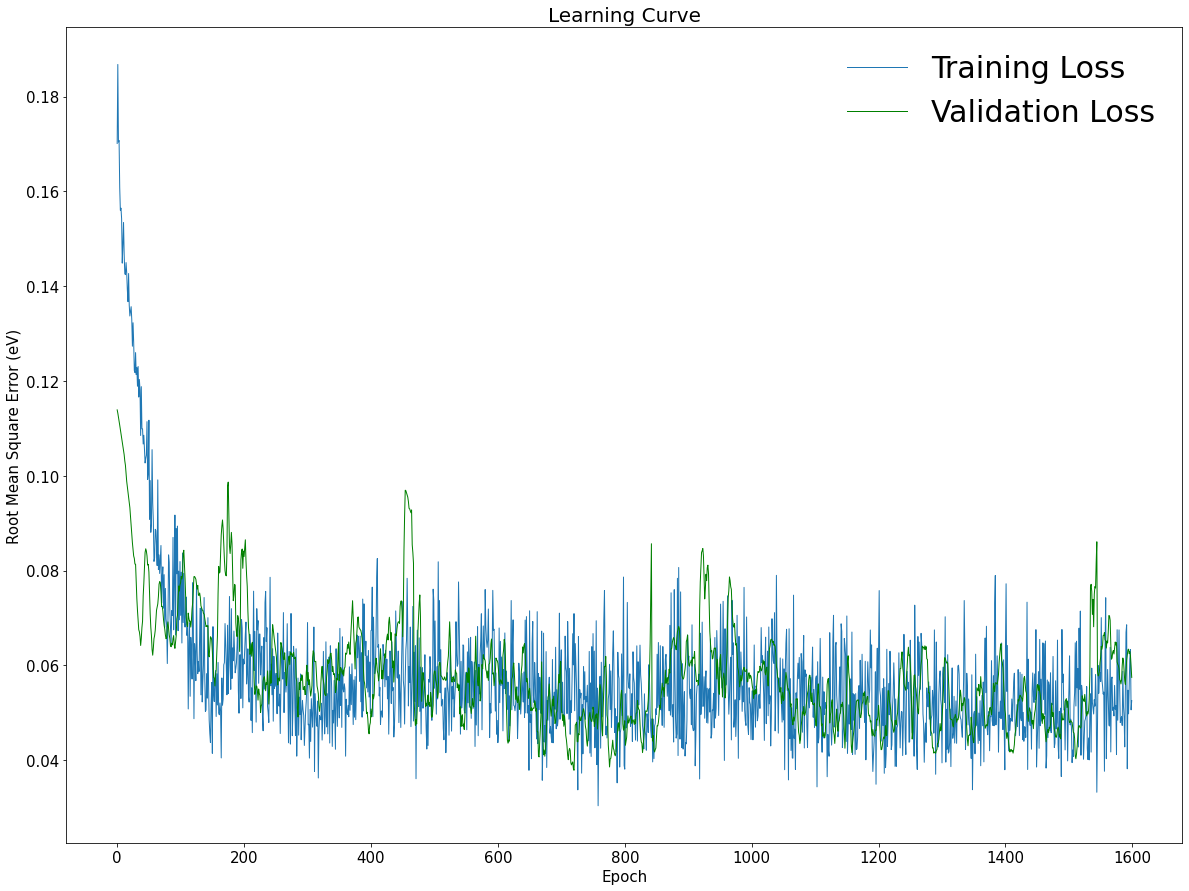

In [156]:
training_losses = model_history_rmse.history['loss']
validation_losses = model_history_rmse.history['val_loss']

plt.figure(figsize=(20, 15))
plt.plot(training_losses, label="Training Loss", linewidth = 1)
plt.plot(validation_losses, label="Validation Loss", linewidth = 1, c='g')
plt.title('Learning Curve', fontsize = 20)
plt.xlabel('Epoch', fontsize = 15)
plt.ylabel('Root Mean Square Error (eV)', fontsize = 15)
plt.legend(frameon=False, fontsize = 30);

# 6. Regressor Performance Plots

In [157]:
GBR.fit(X_train, y_train)
KNR.fit(X_train, y_train)
RFR.fit(X_train, y_train)
SR.fit(X_train, y_train)
ridge.fit(X_train, y_train)
xgbr.fit(X_train, y_train)
xgbr_optimized.fit(X_train, y_train)
light.fit(X_train, y_train)
nn = load_model('model_best_weights.h5', num_cols = len(features.columns))

In [158]:
def trendline(xd, yd, i, name, rmse, ax, order=1, c='k', alpha=1, Rval=False):
    """Make a line of best fit"""

    # Calculate trendline
    coeffs = np.polyfit(xd, yd, order)

    intercept = coeffs[-1]
    slope = coeffs[-2]
    power = coeffs[0] if order == 2 else 0

    minxd = np.min(xd)
    maxxd = np.max(xd)

    xl = np.array([minxd, maxxd])
    yl = power * xl ** 2 + slope * xl + intercept

    # Plot trendline
    if i <= 3:
        ax[0, i].plot(xl, yl, c, alpha=alpha, linestyle='--', linewidth=0.8)

    if i > 3:
        ax[1, i - 4].plot(xl, yl, c, alpha=alpha, linestyle='--', linewidth=0.8)

    # Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(yd) / len(yd)
    ssreg = np.sum((p(xd) - ybar) ** 2)
    sstot = np.sum((yd - ybar) ** 2)
    Rsqr = ssreg / sstot

    if not Rval:
        # Plot R^2 value
        if i <= 3:
            ax[0, i].text(-0.1, -0.325, name, fontsize=18)
            ax[0, i].text(-0.1, -0.355, '$MAE = %0.3f$' % mae, fontsize=18)
            ax[0, i].text(-0.1, -0.385, '$RMSE = %0.3f$' % rmse, fontsize=18)
            ax[0, i].text(-0.1, -0.415, '$R^2 = %0.3f$' % Rsqr, fontsize=18)
        if i > 3:
            ax[1, i - 4].text(-0.1, -0.325, name, fontsize=18)
            ax[1, i - 4].text(-0.1, -0.355, '$MAE = %0.3f$' % mae, fontsize=18)
            ax[1, i - 4].text(-0.1, -0.385, '$RMSE = %0.3f$' % rmse, fontsize=18)
            ax[1, i - 4].text(-0.1, -0.415, '$R^2 = %0.3f$' % Rsqr, fontsize=18)
    else:
        # Return the R^2 value:
        return Rsqr


def plot_data(train_data, test_data, i, name, rmse, mae, ax):
    if i <= 3:
        # Plot data
        ax[0, i].scatter(train_data['G_co (eV)'], train_data['prediction'], label="Training Set",
                         alpha=1, marker='o', s=25)
        ax[0, i].scatter(test_data['G_co (eV)'], test_data['prediction'], label='Testing Set',
                         alpha=1, marker='o', s=25)
        #ax[0,i].set_title(name, fontsize=15)

        # Combine data for best fit line
        x = pd.concat([train_data['G_co (eV)'], test_data['G_co (eV)']])
        y = pd.concat([train_data['prediction'], test_data['prediction']])

        # plot best fit line
        trendline(x, y, i, name, rmse, ax)

        # plot legend/axis
        ax[0, i].legend(loc='upper left', fontsize=18, frameon=False)

    if i > 3:
        # Plot data
        ax[1, i - 4].scatter(train_data['G_co (eV)'], train_data['prediction'], label="Training Set",
                             alpha=1, marker='o', s=25)
        ax[1, i - 4].scatter(test_data['G_co (eV)'], test_data['prediction'], label='Testing Set',
                             alpha=1, marker='o', s=25)
        # ax[1,i-4].set_title(name, fontsize=15)

        # Combine data to create best fit line
        x = pd.concat([train_data['G_co (eV)'], test_data['G_co (eV)']])
        y = pd.concat([train_data['prediction'], test_data['prediction']])

        # Plot best fit line
        trendline(x, y, i, name, rmse, ax)

        # Plot legend/axis
        ax[1, i - 4].legend(loc='upper left', fontsize=18, frameon=False)

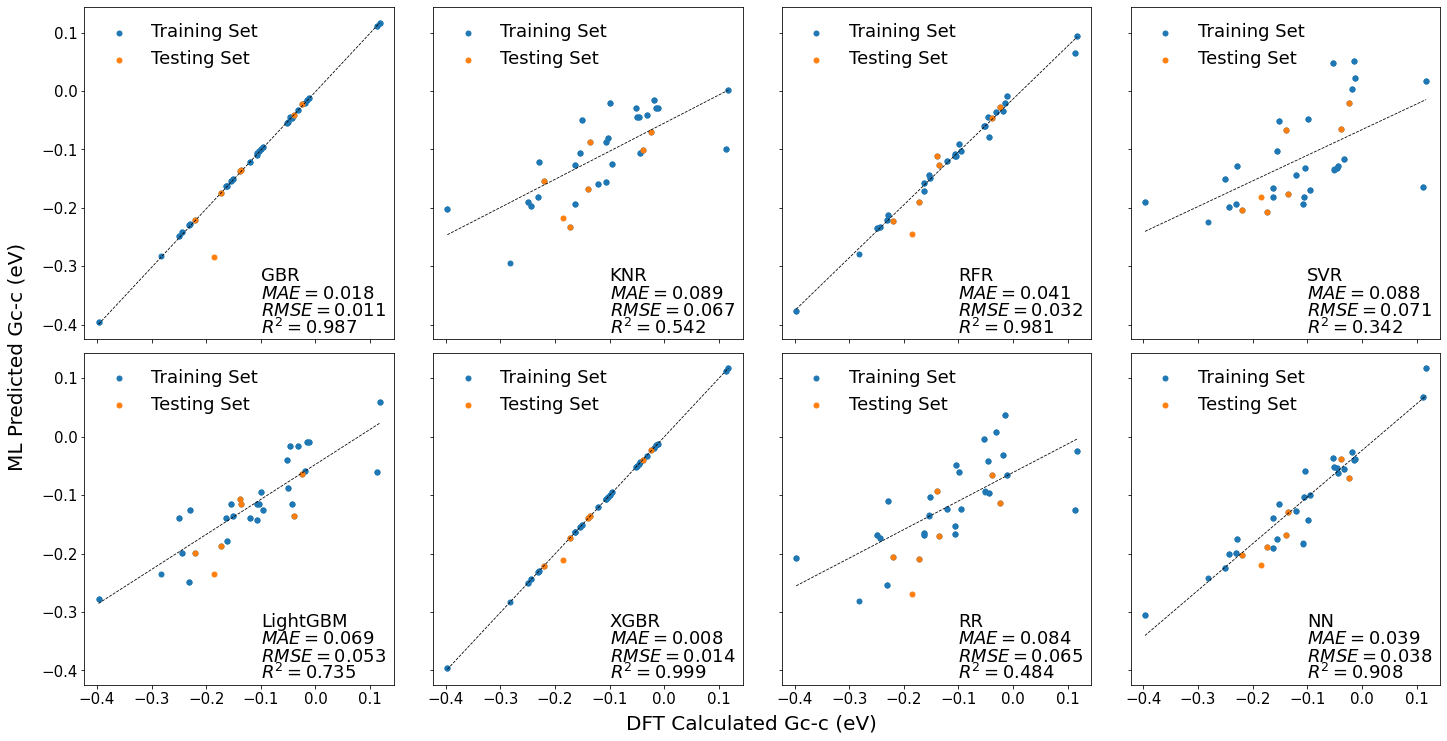

In [159]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharex = True, sharey = True, figsize = (20, 10))

regressors = [GBR, KNR, RFR, SR, light, xgbr_optimized, ridge, nn]

names = {
    
    GBR: 'GBR',
    KNR: 'KNR',
    RFR: 'RFR',
    SR: 'SVR',
    light: 'LightGBM',
    xgbr_optimized: 'XGBR',
    ridge: 'RR',
    nn: 'NN'
    
}

RMSE = {
    
    GBR: results_df.iloc[-1, 0][0],
    KNR: results_df.iloc[-1, 1][0],
    RFR: results_df.iloc[-1, 2][0],
    SR: results_df.iloc[-1, 3][0],
    light: results_df.iloc[-1, 6][0],
    xgbr_optimized: optimized_xgbr_rmse,
    ridge: results_df.iloc[-1, 4][0],
    nn: nn_RMSE
    
}

MAE = {
    
    GBR: results_df.iloc[-1, 0][1],
    KNR: results_df.iloc[-1, 1][1],
    RFR: results_df.iloc[-1, 2][1],
    SR: results_df.iloc[-1, 3][1],
    light: results_df.iloc[-1, 6][1],
    xgbr_optimized: optimized_xgbr_mae,
    ridge: results_df.iloc[-1, 4][1],
    nn: nn_MAE
    
}

# Make Gco predictions on training and testing data using each regressor
for i, reg in enumerate(regressors):
    
    name = names[reg]
    rmse = RMSE[reg]
    mae = MAE[reg]
    
    
    # Predicting training data
    train_data = X_train.copy()
    train_data['G_co (eV)'] = y_train.copy()
    train_data['prediction'] = reg.predict(train_data.iloc[:, :-1])    
    
    # Predicting testing data
    test_data = X_test.copy()
    test_data['G_co (eV)'] = y_test.copy()
    test_data['prediction'] = reg.predict(test_data.iloc[:, :-1])    
    
    # Plotting the performance of each regressor
    plot_data(train_data, test_data, i, name, rmse, mae, ax)

fig.text(0.5, -0.01, 'DFT Calculated Gc-c (eV)', ha='center', va='center', fontsize = 20)
fig.text(-0.01, 0.5, 'ML Predicted Gc-c (eV)', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.tight_layout(pad = 1);

# 7. XGBR Prediction on Full Dataset

In [160]:
prediction_df = pd.read_csv('CO Difference Full Data (with I).csv')

In [161]:
adsorbates = prediction_df[['Adsorbate 1', 'Adsorbate 2']]

In [162]:
prediction_df

,Adsorbate 1,Adsorbate 2,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,...,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,G_C2O2 - Gco,G_CHO - Gco,Difference
0,O,O,1.0,1.0,0.0,0.0,8.0,8.0,3.44,3.44,...,11.83,0.40,185.45,2.31,64.00,36.00,185.50,-0.01526,0.17026,-0.18552
1,O,OH,1.0,2.0,0.0,1.0,8.0,4.5,3.44,2.82,...,9.80,0.31,185.31,2.07,39.06,42.25,177.42,0.06446,0.29583,-0.23137
2,O,N,1.0,1.0,0.0,0.0,8.0,7.0,3.44,3.04,...,10.50,0.45,198.13,2.36,56.25,30.25,198.11,NaN,NaN,NaN
3,O,NH,1.0,2.0,0.0,1.0,8.0,4.0,3.44,2.62,...,9.18,0.33,191.60,2.10,36.00,36.00,174.50,NaN,NaN,NaN
4,O,NH2,1.0,3.0,0.0,2.0,8.0,3.0,3.44,2.48,...,8.76,0.29,189.45,2.01,30.25,42.25,148.84,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,I,SH2,1.0,3.0,0.0,2.0,53.0,6.0,2.66,2.33,...,6.22,0.89,131.90,2.86,870.25,56.25,109.31,NaN,NaN,NaN
285,I,F,1.0,1.0,0.0,0.0,53.0,9.0,2.66,3.98,...,11.02,0.97,194.23,2.98,961.00,49.00,194.18,NaN,NaN,NaN
286,I,Cl,1.0,1.0,0.0,0.0,53.0,17.0,2.66,3.16,...,8.47,1.35,137.10,3.48,1225.00,49.00,137.12,NaN,NaN,NaN
287,I,Br,1.0,1.0,0.0,0.0,53.0,35.0,2.66,2.96,...,7.90,1.53,123.93,3.67,1936.00,49.00,123.88,NaN,NaN,NaN


In [163]:
# Savings the Gco column
targets = prediction_df['Difference']

In [164]:
diff = prediction_df.columns.difference(test_data.columns)

In [165]:
# Removing all columns that were deleted in feature selection to maintain the same prediction features as training
prediction_df = prediction_df.drop(prediction_df.columns.difference(test_data.columns), 1)

In [166]:
prediction_df.columns

Index(['num of Atoms', 'Average Atomic num', 'Average PE',
       'Average Covalent Radius', 'Average FIE', 'Average EA',
       'Average num of Valence Electron', 'PE 1 minus PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'VdW Radius 1 minus VdW Radius 2', 'FIE 1 minus FIE 2',
       'EA 1 minus EA 2', 'num of Valence 1 minus num of Valence 2',
       'Average VdW Radius squared'],
      dtype='object')

In [167]:
df_v5.columns

Index(['num of Atoms', 'Average Atomic num', 'Average PE',
       'Average Covalent Radius', 'Average FIE', 'Average EA',
       'Average num of Valence Electron', 'PE 1 minus PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'VdW Radius 1 minus VdW Radius 2', 'FIE 1 minus FIE 2',
       'EA 1 minus EA 2', 'num of Valence 1 minus num of Valence 2',
       'Average VdW Radius squared', 'Difference'],
      dtype='object')

In [168]:
def scaler(df):
    
    base = pd.read_csv('CO Difference Full Data (with I).csv')
    base = base.drop(columns = ['Adsorbate 1', 'Adsorbate 2', 'Difference'])
    scales = {}
    for i in range(len(base.columns)):
        name = base.columns[i]
        minimum = min(base.iloc[:, i])
        maximum = max(base.iloc[:, i])
        scales[name] = [minimum, maximum]
    
    for i in range(len(df.columns)):
        name_1 = df.columns[i]
        if name_1 == 'Difference':
            pass
        else:
            for j, row in enumerate(df[name_1]):
                df.iloc[j, i] = (row - scales[name_1][0]) / (scales[name_1][1] - scales[name_1][0])
        
    return df


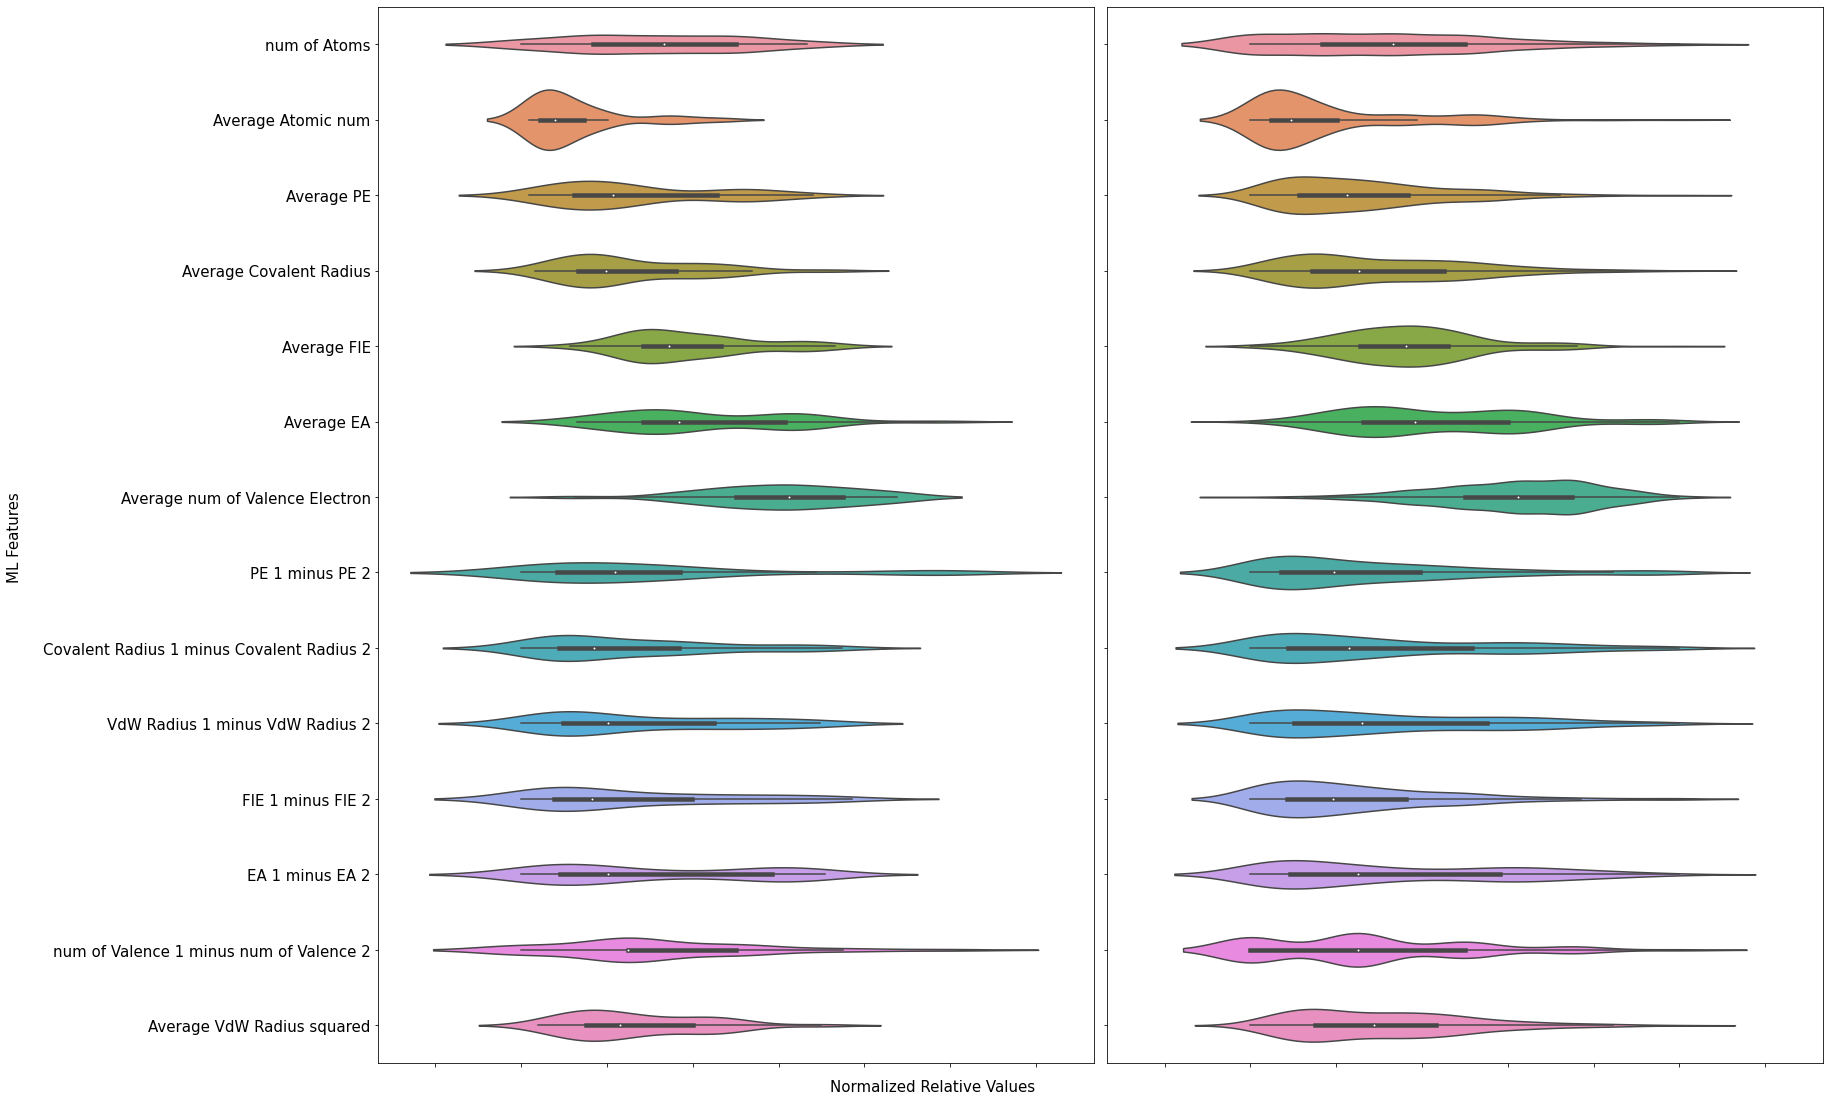

In [169]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (25, 15))

training_df = scaler(df_v5.copy())
training_df = training_df.iloc[:, :-1].melt(var_name='Features', value_name='Values')

full_df = scaler(prediction_df.copy())
full_df = full_df.melt(var_name='Features', value_name='Values')

sns.violinplot(x = 'Values', y = 'Features', data = training_df, ax=ax[0]).set(xticklabels=[])
sns.violinplot(x = 'Values', y = 'Features', data = full_df, ax=ax[1]).set(xticklabels=[])

ax[0].set_ylabel('')    
ax[0].set_xlabel('')
ax[1].set_ylabel('')    
ax[1].set_xlabel('')

fig.text(0.5, -0.01, 'Normalized Relative Values', ha='center', va='center', fontsize = 15)
fig.text(-0.01, 0.5, 'ML Features', ha='center', va='center', rotation='vertical', fontsize = 15)
fig.tight_layout(pad = 1);

In [170]:
'''fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (25, 15))

x = list(prediction_df.columns)

training_df = scaler(df_v5.copy())
full_df = scaler(prediction_df.copy())

ax1.violinplot(training_df.iloc[:, :-1].T, vert=False)
ax2.violinplot(full_df.T, vert=False)

for ax in [ax1, ax2]:
    set_axis_style(ax, x)

fig.text(0.5, -0.01, 'ML Features', ha='center', va='center', fontsize = 20)
fig.text(-0.01, 0.5, 'Relative Values', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.tight_layout(pad = 1);'''

"fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (25, 15))\n\nx = list(prediction_df.columns)\n\ntraining_df = scaler(df_v5.copy())\nfull_df = scaler(prediction_df.copy())\n\nax1.violinplot(training_df.iloc[:, :-1].T, vert=False)\nax2.violinplot(full_df.T, vert=False)\n\nfor ax in [ax1, ax2]:\n    set_axis_style(ax, x)\n\nfig.text(0.5, -0.01, 'ML Features', ha='center', va='center', fontsize = 20)\nfig.text(-0.01, 0.5, 'Relative Values', ha='center', va='center', rotation='vertical', fontsize = 20)\nfig.tight_layout(pad = 1);"

In [171]:
# Adding the Gco column back
prediction_df['Difference'] = targets

In [172]:
def ml_predict(dataframe, name, reg):
    dataframe['Gdiff_ML'] = np.nan
    for i, col in enumerate(dataframe['Gdiff_ML']):
        if pd.isnull(col):
            dataframe.iloc[i, -1] = reg.predict(pd.DataFrame(dataframe.iloc[i, 0:-2]).T)

    dataframe['Gdiff_Final'] = dataframe[name]
    for i, col in enumerate(dataframe['Gdiff_Final']):
        if pd.isnull(col):
            dataframe.iloc[i, -1] = reg.predict(pd.DataFrame(dataframe.iloc[i, 0:-3]).T)

In [173]:
prediction_df

,num of Atoms,Average Atomic num,Average PE,Average Covalent Radius,Average FIE,Average EA,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,VdW Radius 1 minus VdW Radius 2,FIE 1 minus FIE 2,EA 1 minus EA 2,num of Valence 1 minus num of Valence 2,Average VdW Radius squared,Difference
0,1.0,8.00,3.44,0.63,13.62,1.46,6.0,0.00,0.00,0.00,0.00,0.00,0.0,2.31,-0.18552
1,1.5,6.25,3.13,0.56,13.61,1.28,6.5,0.62,0.15,0.16,0.01,0.35,1.0,2.07,-0.23137
2,1.0,7.50,3.24,0.67,14.08,0.70,5.5,0.40,0.08,0.03,0.92,1.53,1.0,2.36,NaN
3,1.5,6.00,3.03,0.58,13.84,0.90,6.0,0.82,0.11,0.15,0.45,1.12,0.0,2.10,NaN
4,2.0,5.50,2.96,0.54,13.76,0.97,6.5,0.96,0.18,0.20,0.29,0.98,1.0,2.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2.0,29.50,2.49,0.95,11.48,2.13,7.5,0.33,0.77,0.58,2.07,1.86,1.0,2.86,NaN
285,1.0,31.00,3.32,0.99,13.94,3.23,7.0,1.32,0.69,0.51,6.97,0.34,0.0,2.98,NaN
286,1.0,35.00,2.91,1.16,11.71,3.34,7.0,0.50,0.34,0.23,2.52,0.55,0.0,3.48,NaN
287,1.0,44.00,2.81,1.24,11.13,3.21,7.0,0.30,0.19,0.13,1.36,0.30,0.0,3.67,NaN


In [174]:
ml_predict(prediction_df, 'Difference' ,xgbr_optimized)

In [175]:
prediction_df

,num of Atoms,Average Atomic num,Average PE,Average Covalent Radius,Average FIE,Average EA,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,VdW Radius 1 minus VdW Radius 2,FIE 1 minus FIE 2,EA 1 minus EA 2,num of Valence 1 minus num of Valence 2,Average VdW Radius squared,Difference,Gdiff_ML,Gdiff_Final
0,1.0,8.00,3.44,0.63,13.62,1.46,6.0,0.00,0.00,0.00,0.00,0.00,0.0,2.31,-0.18552,-0.210388,-0.185520
1,1.5,6.25,3.13,0.56,13.61,1.28,6.5,0.62,0.15,0.16,0.01,0.35,1.0,2.07,-0.23137,-0.231271,-0.231370
2,1.0,7.50,3.24,0.67,14.08,0.70,5.5,0.40,0.08,0.03,0.92,1.53,1.0,2.36,NaN,-0.215164,-0.215164
3,1.5,6.00,3.03,0.58,13.84,0.90,6.0,0.82,0.11,0.15,0.45,1.12,0.0,2.10,NaN,-0.210278,-0.210278
4,2.0,5.50,2.96,0.54,13.76,0.97,6.5,0.96,0.18,0.20,0.29,0.98,1.0,2.01,NaN,-0.190093,-0.190093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2.0,29.50,2.49,0.95,11.48,2.13,7.5,0.33,0.77,0.58,2.07,1.86,1.0,2.86,NaN,-0.040949,-0.040949
285,1.0,31.00,3.32,0.99,13.94,3.23,7.0,1.32,0.69,0.51,6.97,0.34,0.0,2.98,NaN,-0.053277,-0.053277
286,1.0,35.00,2.91,1.16,11.71,3.34,7.0,0.50,0.34,0.23,2.52,0.55,0.0,3.48,NaN,-0.019210,-0.019210
287,1.0,44.00,2.81,1.24,11.13,3.21,7.0,0.30,0.19,0.13,1.36,0.30,0.0,3.67,NaN,-0.018709,-0.018709


In [176]:
b = np.sqrt(((prediction_df['Difference'] - prediction_df['Gdiff_ML'])**2).mean()).round(4)

In [177]:
print('Training RMSE: {}'.format(optimized_xgbr_rmse.round(4)))
print('Testing RMSE: {}'.format(b))

Training RMSE: 0.0142
Testing RMSE: 0.0031


In [178]:
prediction_df['Gdiff_Final'].describe()

count    289.000000
mean      -0.111239
std        0.106478
min       -0.397030
25%       -0.185098
50%       -0.103133
75%       -0.040949
max        0.117560
Name: Gdiff_Final, dtype: float64

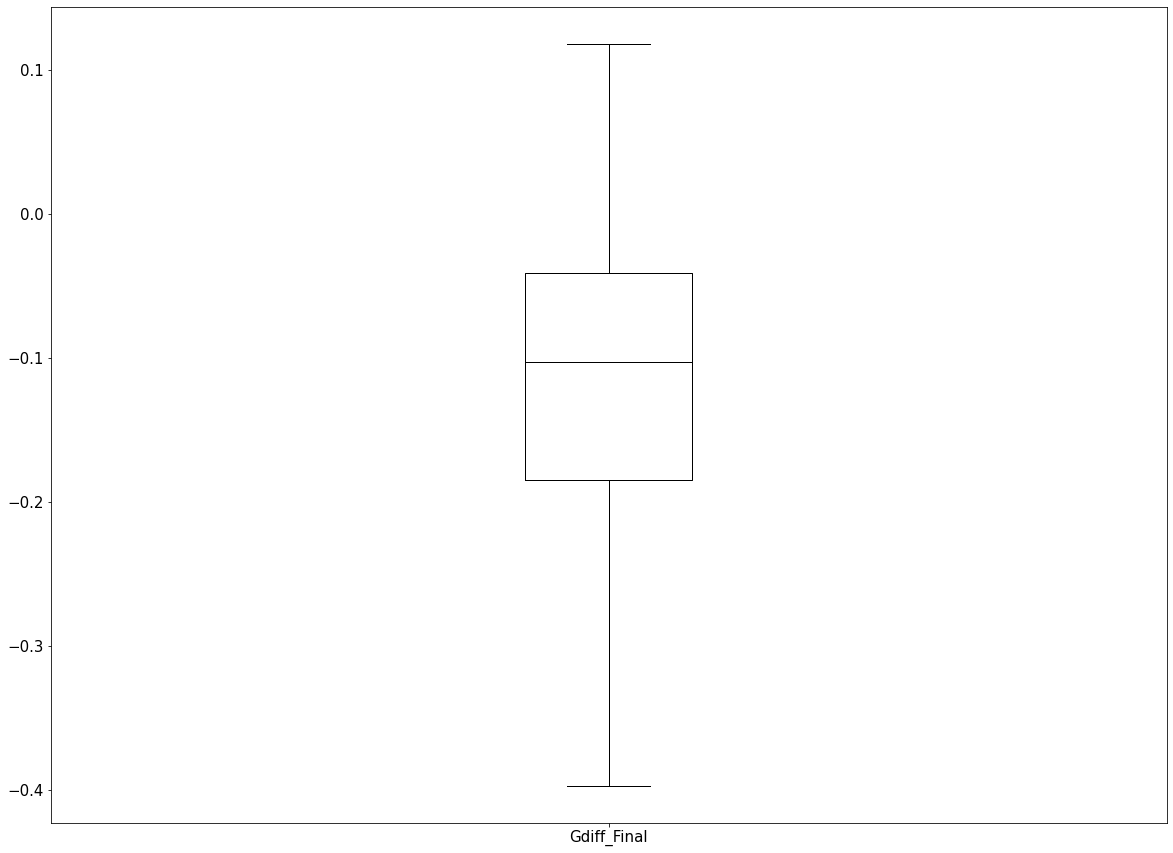

In [179]:
prediction_df.boxplot(color=dict(boxes='black', whiskers='black', medians='black', caps='black'), 
                      column='Gdiff_Final', grid=False, figsize=(20, 15));

In [180]:
final = adsorbates.join(prediction_df, how = 'left')

In [181]:
final

,Adsorbate 1,Adsorbate 2,num of Atoms,Average Atomic num,Average PE,Average Covalent Radius,Average FIE,Average EA,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,VdW Radius 1 minus VdW Radius 2,FIE 1 minus FIE 2,EA 1 minus EA 2,num of Valence 1 minus num of Valence 2,Average VdW Radius squared,Difference,Gdiff_ML,Gdiff_Final
0,O,O,1.0,8.00,3.44,0.63,13.62,1.46,6.0,0.00,0.00,0.00,0.00,0.00,0.0,2.31,-0.18552,-0.210388,-0.185520
1,O,OH,1.5,6.25,3.13,0.56,13.61,1.28,6.5,0.62,0.15,0.16,0.01,0.35,1.0,2.07,-0.23137,-0.231271,-0.231370
2,O,N,1.0,7.50,3.24,0.67,14.08,0.70,5.5,0.40,0.08,0.03,0.92,1.53,1.0,2.36,NaN,-0.215164,-0.215164
3,O,NH,1.5,6.00,3.03,0.58,13.84,0.90,6.0,0.82,0.11,0.15,0.45,1.12,0.0,2.10,NaN,-0.210278,-0.210278
4,O,NH2,2.0,5.50,2.96,0.54,13.76,0.97,6.5,0.96,0.18,0.20,0.29,0.98,1.0,2.01,NaN,-0.190093,-0.190093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,I,SH2,2.0,29.50,2.49,0.95,11.48,2.13,7.5,0.33,0.77,0.58,2.07,1.86,1.0,2.86,NaN,-0.040949,-0.040949
285,I,F,1.0,31.00,3.32,0.99,13.94,3.23,7.0,1.32,0.69,0.51,6.97,0.34,0.0,2.98,NaN,-0.053277,-0.053277
286,I,Cl,1.0,35.00,2.91,1.16,11.71,3.34,7.0,0.50,0.34,0.23,2.52,0.55,0.0,3.48,NaN,-0.019210,-0.019210
287,I,Br,1.0,44.00,2.81,1.24,11.13,3.21,7.0,0.30,0.19,0.13,1.36,0.30,0.0,3.67,NaN,-0.018709,-0.018709


In [183]:
# Save the predicted dataframe
final.to_csv('predicted_Gdiff_xgbr.csv')

# 8. delta_Gco Heat Map

In [184]:
adsorbates = final['Adsorbate 1'].unique()
binding_energy = final['Gdiff_Final']

In [185]:
binding_energy

0     -0.185520
1     -0.231370
2     -0.215164
3     -0.210278
4     -0.190093
         ...   
284   -0.040949
285   -0.053277
286   -0.019210
287   -0.018709
288   -0.066538
Name: Gdiff_Final, Length: 289, dtype: float64

In [186]:
def transform_2D(series):
    result = []
    temp = []
    count = 1
    for i in series:
        if count % 18 != 0:
            temp.append(i)
            count += 1
        else:
            count = 1
            result.append(temp)
            temp = []
            temp.append(i)
            count += 1
    result.append(temp)
    return result

In [187]:
# Transform series into a 2D array
twoD = transform_2D(binding_energy)

In [188]:
twoD

[[-0.18552000000000002,
  -0.23137,
  -0.21516446769237518,
  -0.21027781069278717,
  -0.19009262323379517,
  0.04609870910644531,
  0.005745064467191696,
  -0.2028530240058899,
  -0.2259620875120163,
  -0.2644451856613159,
  -0.01410716399550438,
  -0.14540506899356842,
  0.01011198852211237,
  -0.16162137687206268,
  -0.15136,
  -0.03151671588420868,
  -0.042521633207798004],
 [-0.23137,
  -0.28251,
  -0.13717976212501526,
  -0.16783592104911804,
  -0.24249716103076935,
  -0.22033000000000003,
  -0.050730000000000004,
  -0.16262000000000001,
  -0.30475863814353943,
  -0.32402339577674866,
  -0.021370626986026764,
  -0.13138945400714874,
  -0.39703,
  -0.13604000000000002,
  -0.043288394808769226,
  -0.04697515070438385,
  -0.05095745623111725],
 [-0.21516446769237518,
  -0.13717976212501526,
  -0.20537640154361725,
  -0.21516446769237518,
  -0.11029549688100815,
  0.045237842947244644,
  -0.229,
  -0.22346735000610352,
  -0.18509776890277863,
  -0.09523,
  0.11756,
  -0.1114688441157

In [189]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from matplotlib.colors import ListedColormap




#Plotting
trace = go.Heatmap(z = twoD,
                   x = adsorbates,
                   y = adsorbates,
                   colorscale = 'YlOrBr',
                   colorbar   = dict(title = "Delta_Gc-c",
                                     titleside = "right"
                                    )
                  )

layout = go.Layout(dict(title = "Gc-c for different adsorbate combinations",
                        autosize = False,
                        height  = 1000,
                        width   = 1000,
                        yaxis   = dict(tickfont = dict(size = 15)),
                        xaxis   = dict(tickfont = dict(size = 15))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

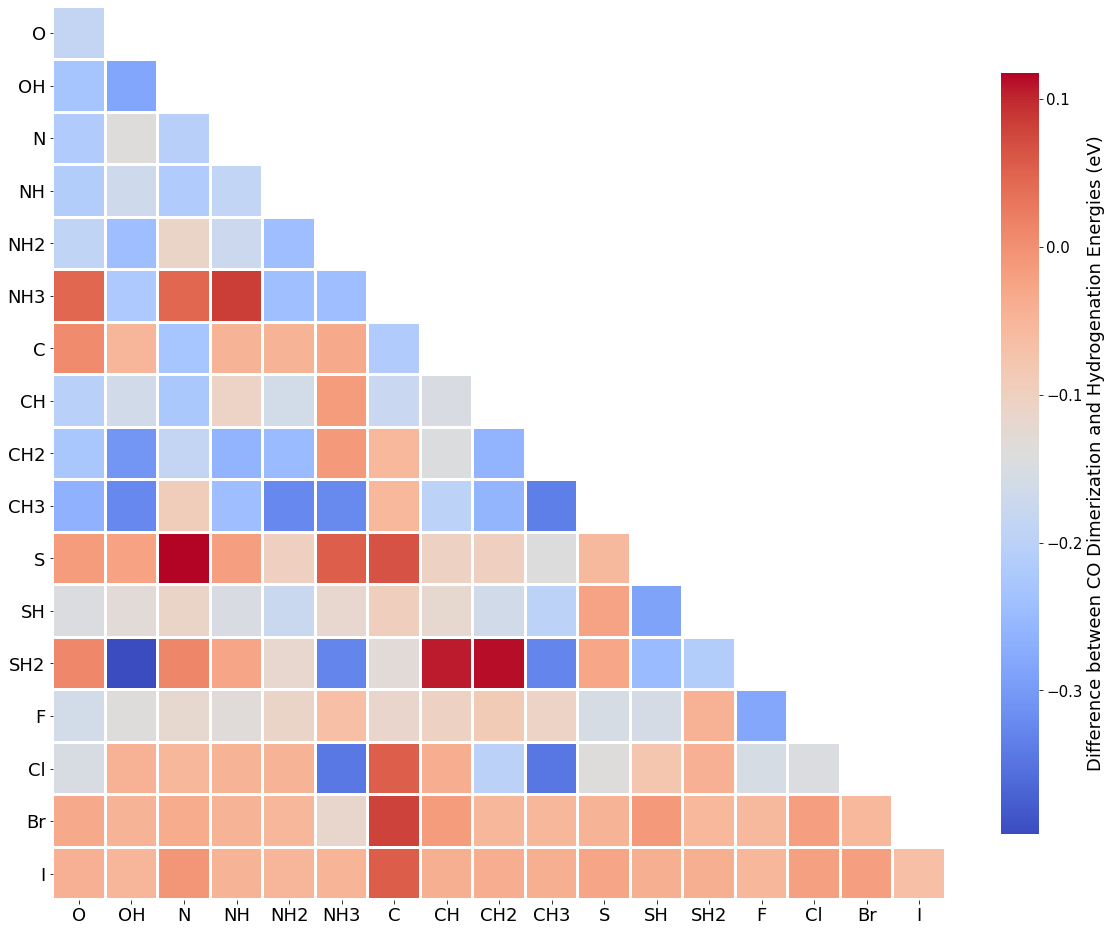

In [190]:
import matplotlib

cmap1 = matplotlib.colors.ListedColormap(['g'])
mask = np.tril(np.ones_like(twoD, dtype=bool))

ax = sns.heatmap(twoD, linewidth=2, mask = 1 - mask,
                 cmap = "coolwarm", square = True, cbar_kws={'label': 'Difference between CO Dimerization and Hydrogenation Energies (eV)', 'shrink': 0.7})
ax.figure.axes[-1].yaxis.label.set_size(18)

#ax = sns.heatmap(twoD, linewidth=2, mask = np.array(twoD) < 0.3, cmap = cmap1, square = True, cbar=False)

ax.set_xticklabels(adsorbates, rotation = 0, size = 18)
ax.set_yticklabels(adsorbates, rotation = 0, size = 18)

plt.show()